In [160]:
import os
from tqdm.auto import tqdm
%load_ext autoreload
%autoreload 2
from helpers import get_df_from_logdir
import pandas as pd
import plotly.express as px
import numpy as np
import json
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [196]:
config_name = 'rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq'
path = f"/home/sergei/ray_results/{config_name}/"
trials = os.listdir(path)
trials = [os.path.join(path, trial) for trial in trials]
trials = sorted(filter(os.path.isdir, trials))
print(f"Got {len(trials)} trials")

Got 406 trials


# Reading trial data

In [197]:
def get_all_epochs(trial):
    try:
        df = get_df_from_logdir(trial, do_tqdm=False)
    except FileNotFoundError:
        return None
    except json.JSONDecodeError:
        return None
    
    return df

In [198]:
dfs = {trial: get_all_epochs(trial) for trial in tqdm(trials)}

In [240]:
df1 = dfs[trials[1]]

In [241]:
df1['losses/opt1/sparsity/coeff'][::5]

0       1.000000e-09
5       1.000000e-09
10      1.000000e-09
15      1.000000e-09
20      1.000000e-09
            ...     
5975    4.194304e-03
5980    4.194304e-03
5985    4.194304e-03
5990    2.097152e-03
5995    2.097152e-03
Name: losses/opt1/sparsity/coeff, Length: 1200, dtype: float64

In [263]:
def plot_trial_details(df1):
    f1 = df1['losses/opt1/fit_all_on/value'][::5]
    fp = df1['losses/opt1/fit/value'][::5]
    sg = (fp - f1) / fp

    plt.figure(figsize=(15, 5))
    plt.plot(df1['losses/opt1/sparsity/coeff'][::5], label='sparsity_coeff')
    plt.plot(df1['losses/opt1/sparsity/value'][::5], label='sparsity_val')
    plt.plot(df1['metrics/|last_mult_sparsity_gap'][::5], label='msg')
    plt.plot(sg, label='msg_nodelay', alpha=0.5)
    plt.yscale('log')
    plt.legend()
    plt.show()

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00000_0__gin__freq__choice=100,_gin__mult__uniform=0.83019_2021-03-09_15-38-43 6000


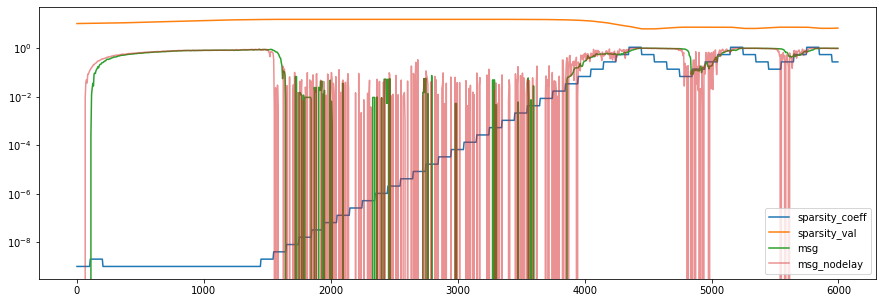

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00001_1__gin__freq__choice=50,_gin__mult__uniform=0.3375_2021-03-09_15-38-43 6000


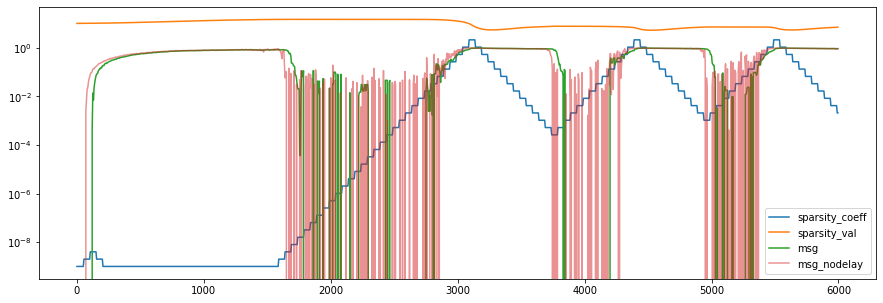

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00002_2__gin__freq__choice=200,_gin__mult__uniform=0.22609_2021-03-09_15-38-43 6000


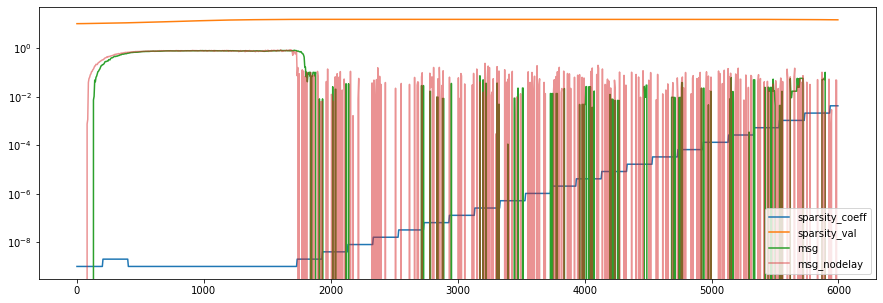

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00003_3__gin__freq__choice=70,_gin__mult__uniform=0.33809_2021-03-09_15-38-43 6000


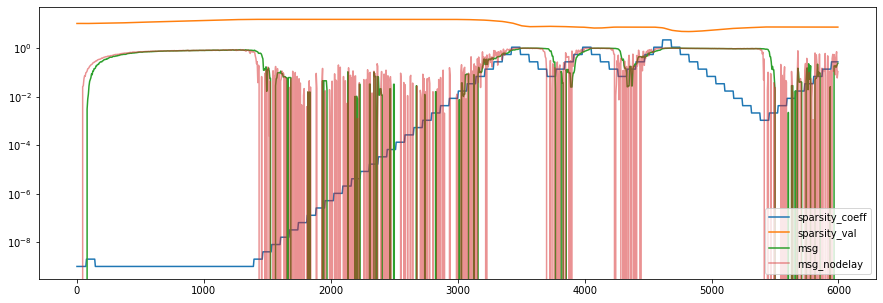

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00004_4__gin__freq__choice=10,_gin__mult__uniform=0.46053_2021-03-09_15-38-43 6000


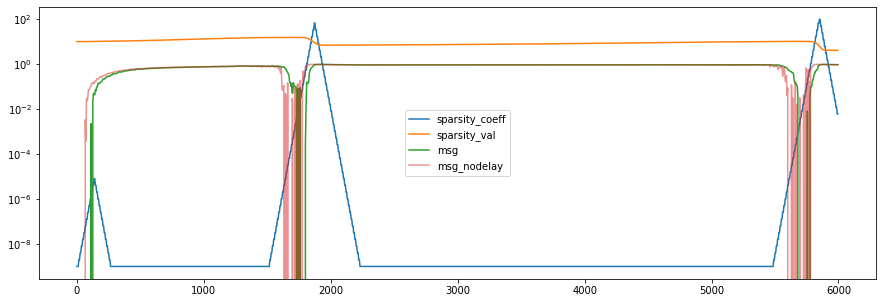

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00005_5__gin__freq__choice=10,_gin__mult__uniform=0.5704_2021-03-09_15-38-43 6000


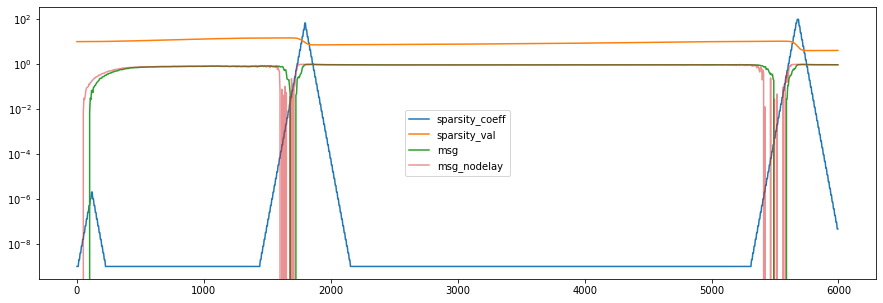

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00006_6__gin__freq__choice=100,_gin__mult__uniform=0.28462_2021-03-09_15-38-43 6000


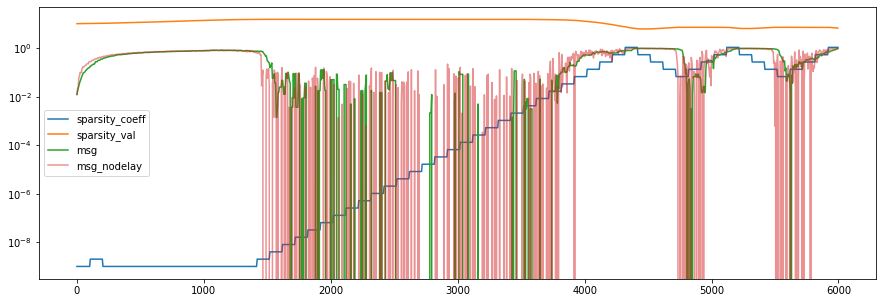

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00007_7__gin__freq__choice=70,_gin__mult__uniform=0.78002_2021-03-09_15-38-43 6000


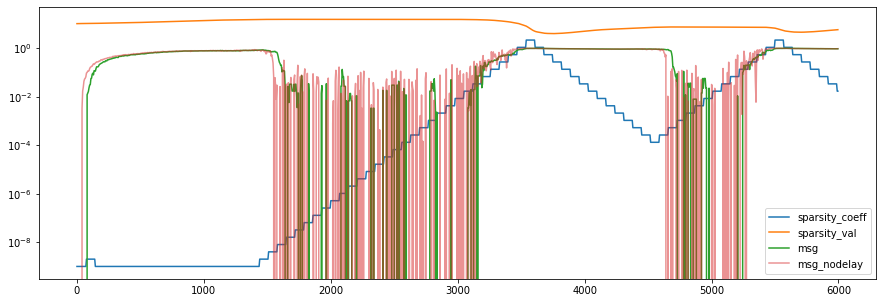

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00008_8__gin__freq__choice=50,_gin__mult__uniform=0.5189_2021-03-09_15-38-43 6000


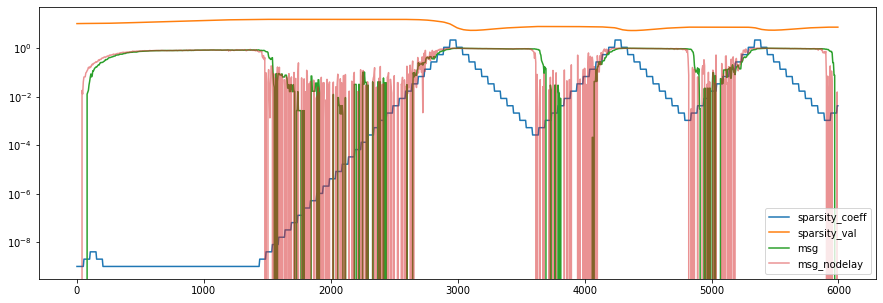

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00009_9__gin__freq__choice=400,_gin__mult__uniform=0.17752_2021-03-09_15-38-43 6000


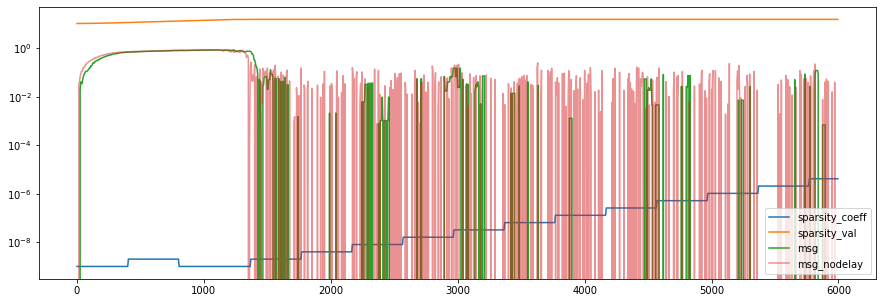

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00010_10__gin__freq__choice=30,_gin__mult__uniform=0.13483_2021-03-09_15-38-43 6000


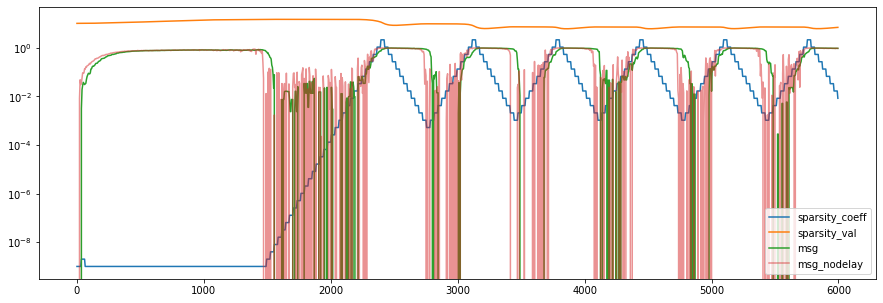

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00011_11__gin__freq__choice=400,_gin__mult__uniform=0.46264_2021-03-09_15-38-43 6000


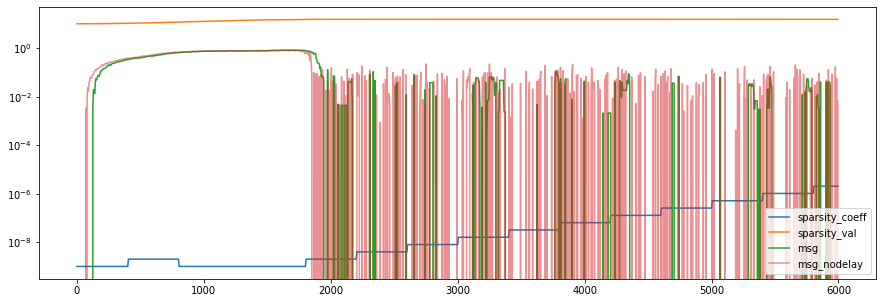

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00012_12__gin__freq__choice=10,_gin__mult__uniform=0.71856_2021-03-09_15-38-43 6000


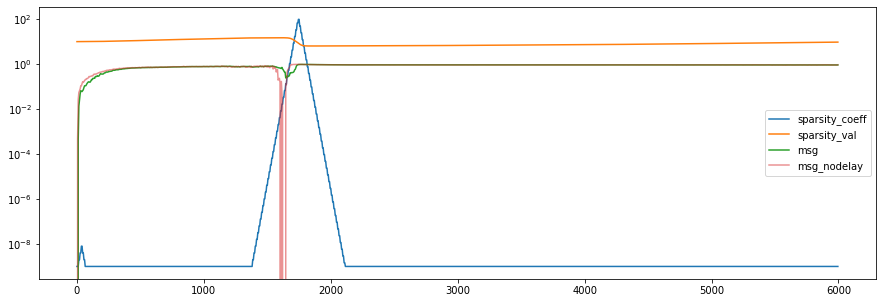

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00013_13__gin__freq__choice=50,_gin__mult__uniform=0.54464_2021-03-09_15-38-43 6000


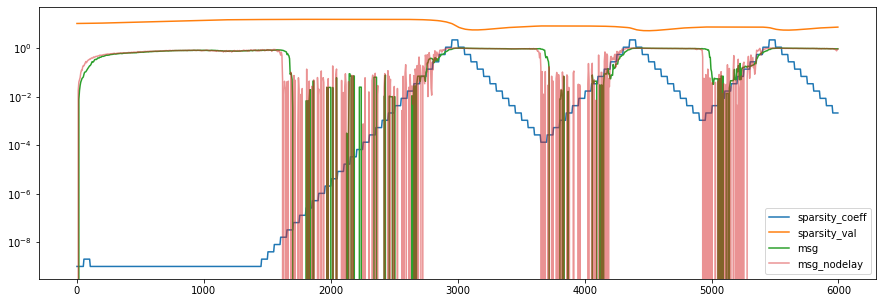

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00014_14__gin__freq__choice=30,_gin__mult__uniform=0.51423_2021-03-09_15-38-43 6000


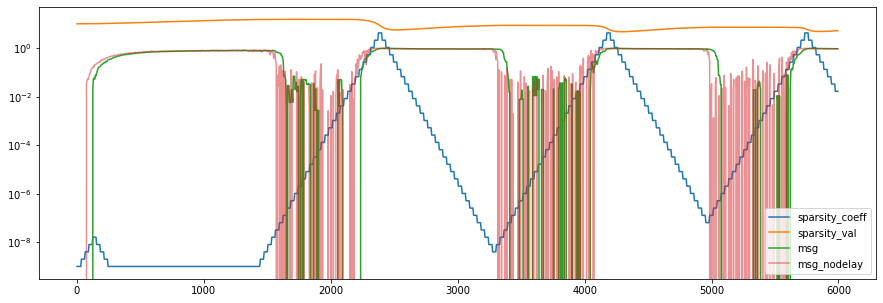

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00015_15__gin__freq__choice=50,_gin__mult__uniform=0.52657_2021-03-09_15-38-43 6000


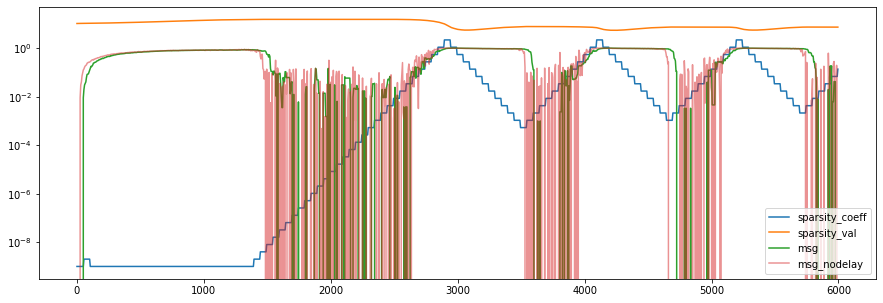

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00016_16__gin__freq__choice=10,_gin__mult__uniform=0.28306_2021-03-09_15-38-43 6000


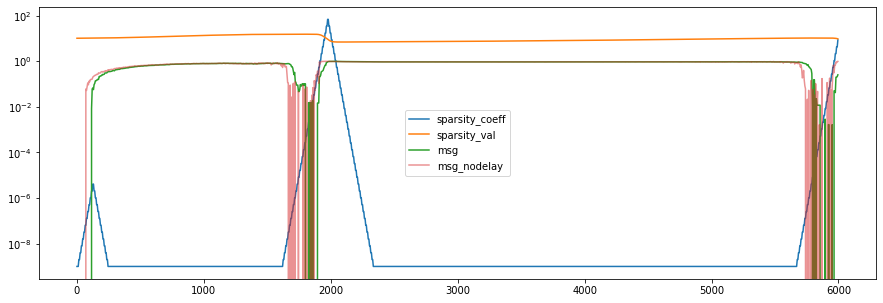

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00017_17__gin__freq__choice=30,_gin__mult__uniform=0.72563_2021-03-09_15-38-43 6000


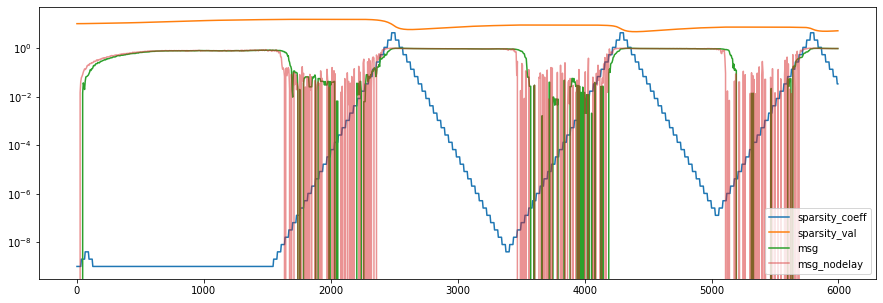

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00018_18__gin__freq__choice=300,_gin__mult__uniform=0.78311_2021-03-09_15-38-43 6000


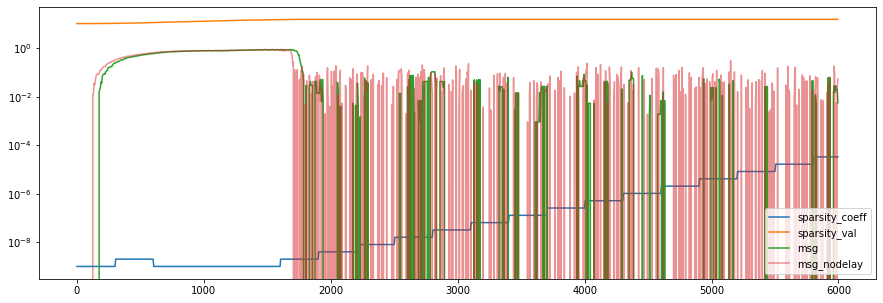

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00019_19__gin__freq__choice=400,_gin__mult__uniform=0.25982_2021-03-09_15-38-43 6000


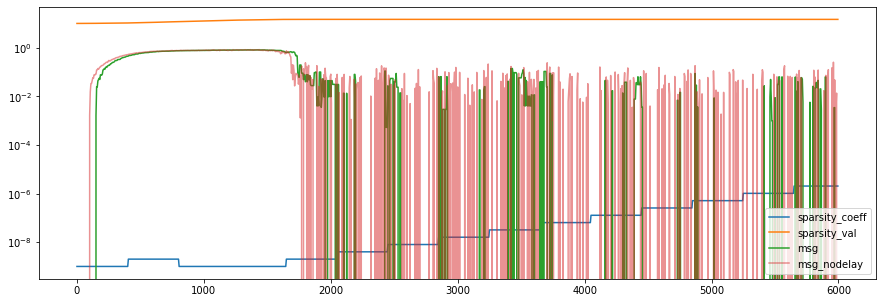

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00020_20__gin__freq__choice=400,_gin__mult__uniform=0.50657_2021-03-09_15-38-43 6000


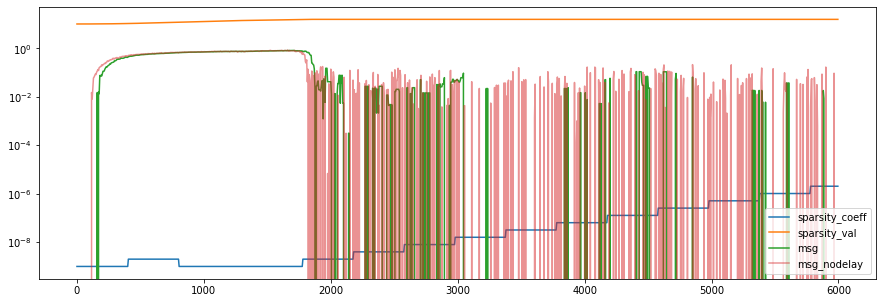

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00021_21__gin__freq__choice=10,_gin__mult__uniform=0.71198_2021-03-09_15-38-43 6000


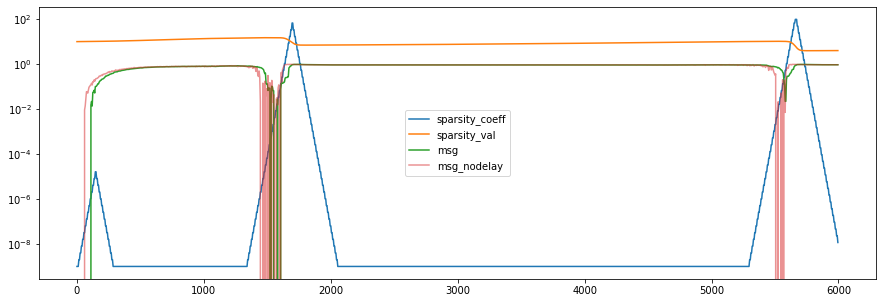

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00022_22__gin__freq__choice=100,_gin__mult__uniform=0.68481_2021-03-09_15-38-43 6000


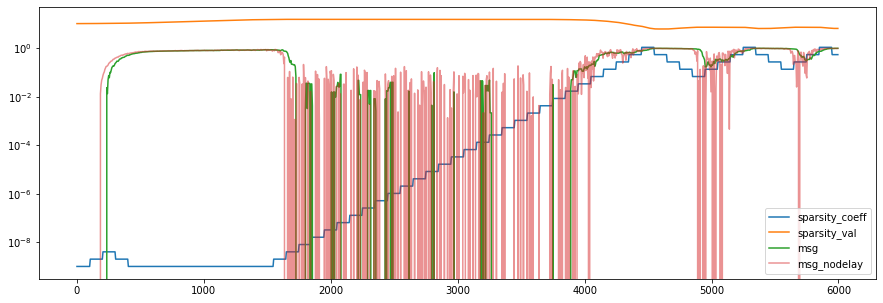

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00023_23__gin__freq__choice=100,_gin__mult__uniform=0.137_2021-03-09_15-38-43 6000


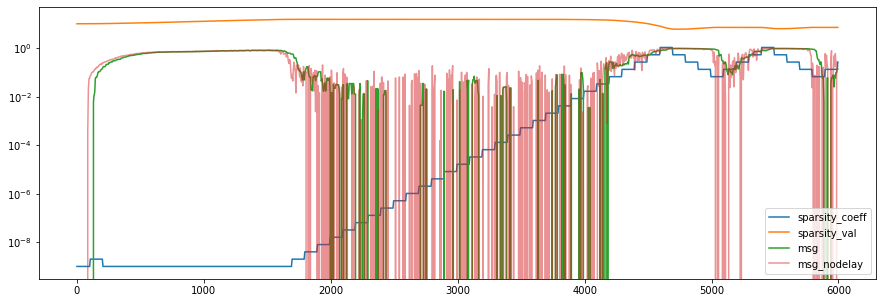

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00024_24__gin__freq__choice=50,_gin__mult__uniform=0.30065_2021-03-09_15-38-43 6000


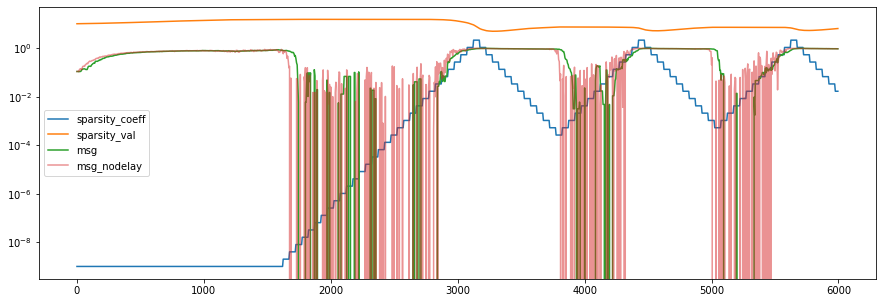

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00025_25__gin__freq__choice=100,_gin__mult__uniform=0.41405_2021-03-09_15-38-43 6000


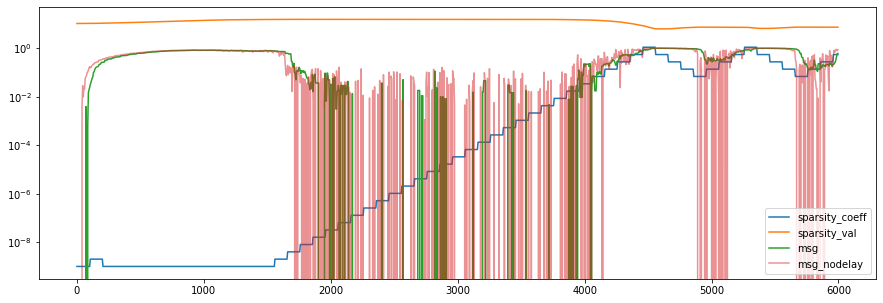

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00026_26__gin__freq__choice=30,_gin__mult__uniform=0.48479_2021-03-09_15-38-43 6000


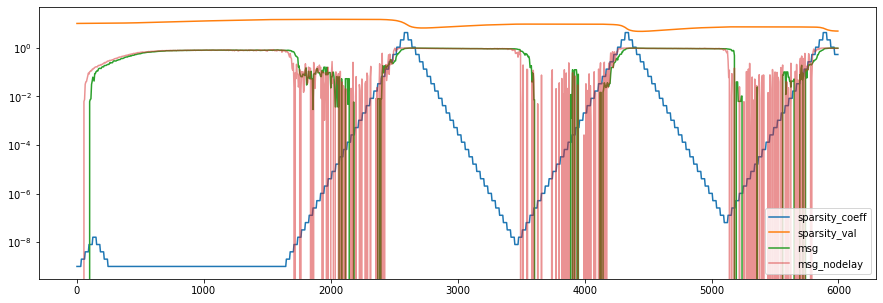

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00027_27__gin__freq__choice=70,_gin__mult__uniform=0.70359_2021-03-09_15-38-44 6000


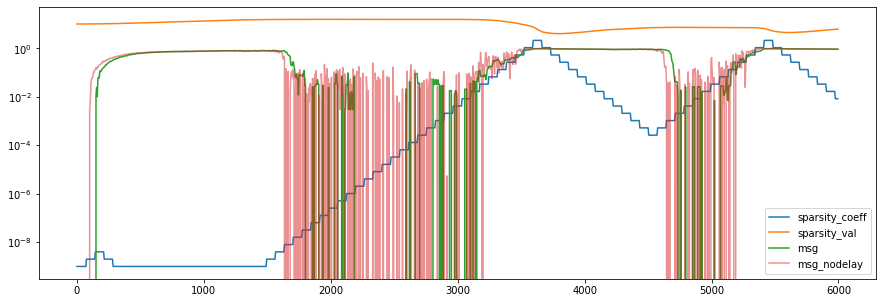

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00028_28__gin__freq__choice=50,_gin__mult__uniform=0.61873_2021-03-09_15-38-44 6000


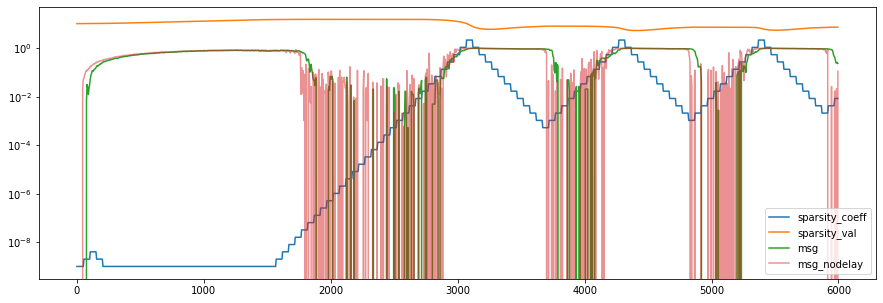

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00029_29__gin__freq__choice=50,_gin__mult__uniform=0.26564_2021-03-09_15-38-44 6000


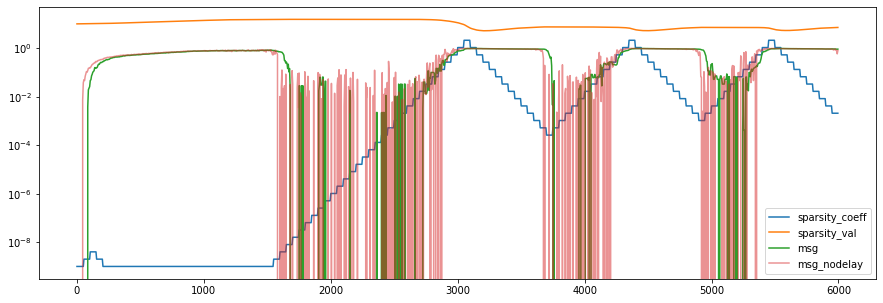

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00030_30__gin__freq__choice=10,_gin__mult__uniform=0.66953_2021-03-09_15-38-44 6000


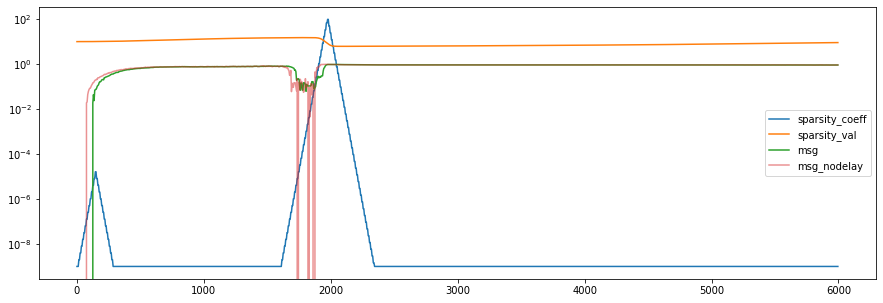

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00031_31__gin__freq__choice=300,_gin__mult__uniform=0.60366_2021-03-09_15-38-44 6000


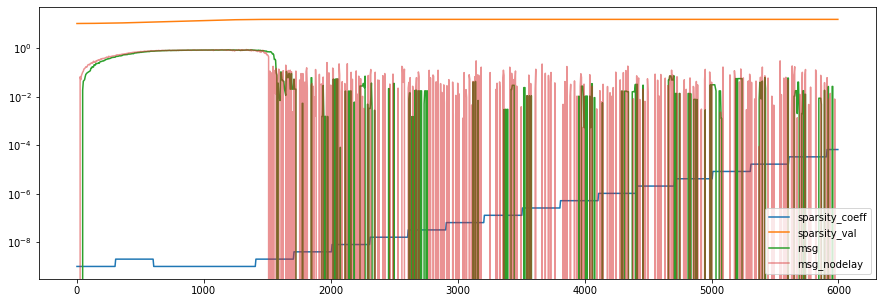

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00032_32__gin__freq__choice=70,_gin__mult__uniform=0.48794_2021-03-09_15-38-44 4679


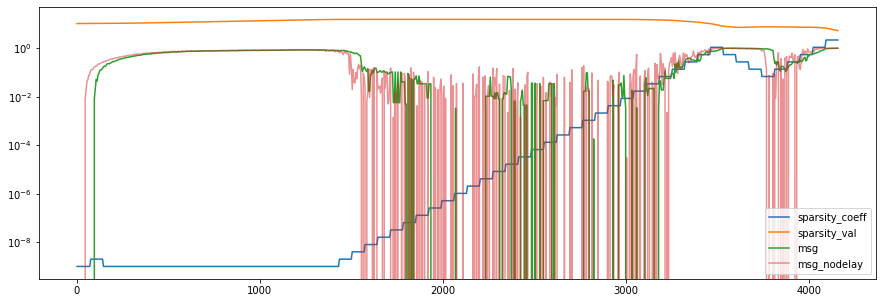

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00033_33__gin__freq__choice=50,_gin__mult__uniform=0.10352_2021-03-09_15-38-44 4622


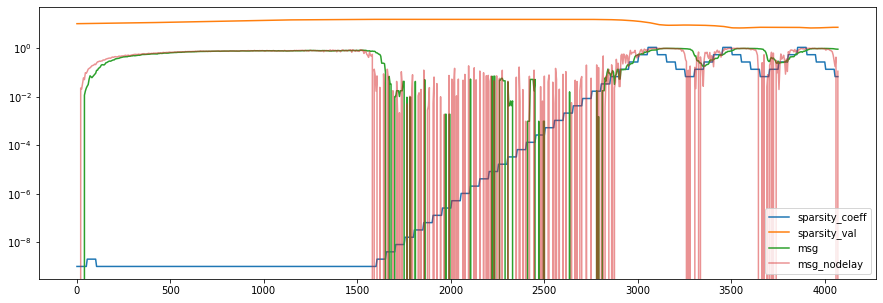

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00034_34__gin__freq__choice=300,_gin__mult__uniform=0.30578_2021-03-09_16-57-21 4411


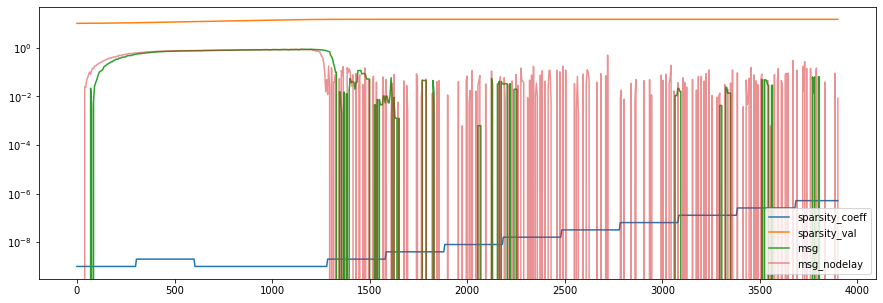

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00035_35__gin__freq__choice=10,_gin__mult__uniform=0.457_2021-03-09_16-57-21 4314


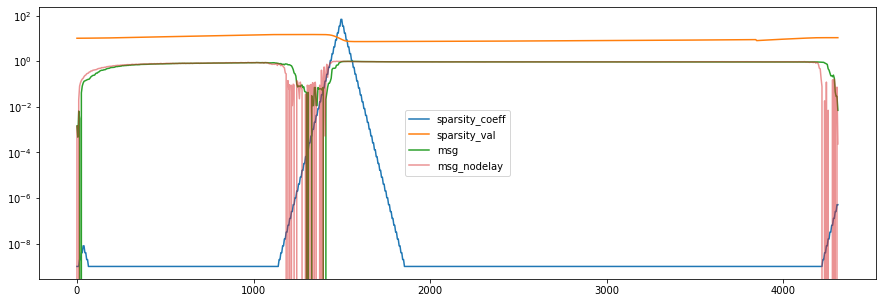

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00036_36__gin__freq__choice=70,_gin__mult__uniform=0.40626_2021-03-09_16-59-21 4407


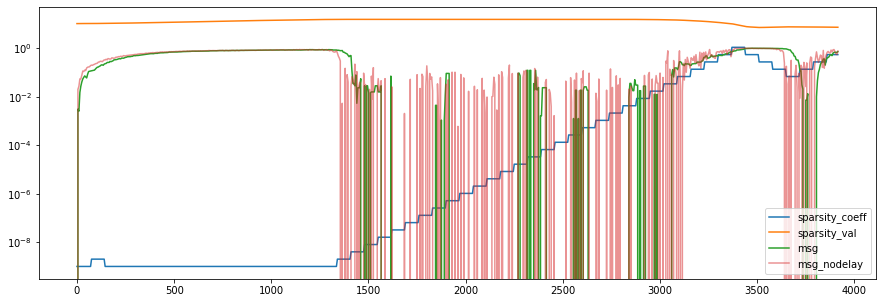

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00037_37__gin__freq__choice=10,_gin__mult__uniform=0.7281_2021-03-09_16-59-21 4567


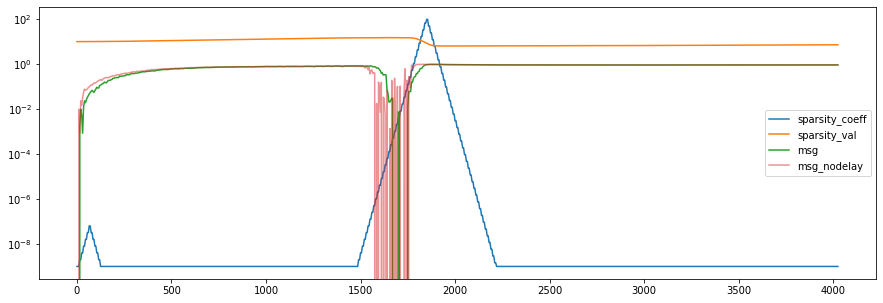

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00038_38__gin__freq__choice=400,_gin__mult__uniform=0.73399_2021-03-09_17-00-02 4327


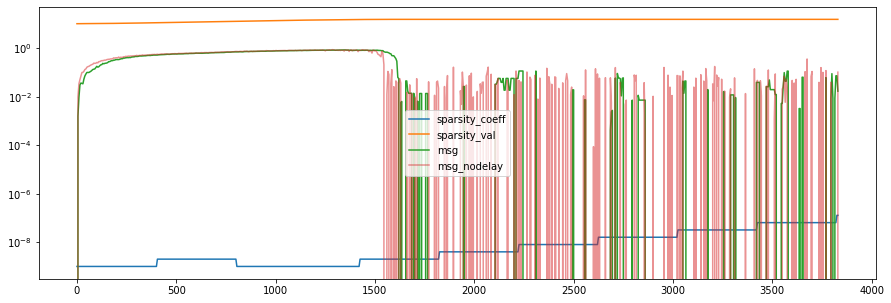

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00039_39__gin__freq__choice=50,_gin__mult__uniform=0.69452_2021-03-09_17-00-02 4522


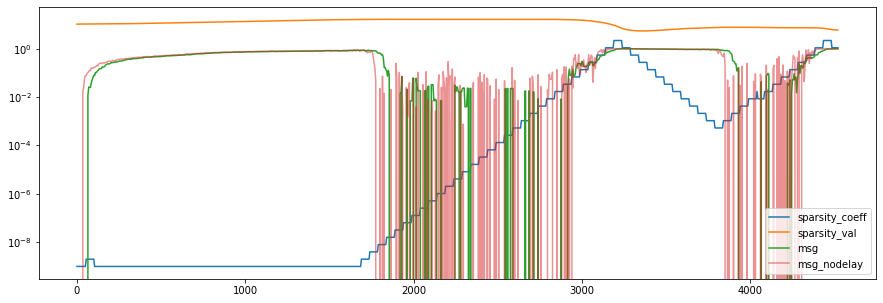

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00040_40__gin__freq__choice=30,_gin__mult__uniform=0.80557_2021-03-09_17-00-26 4378


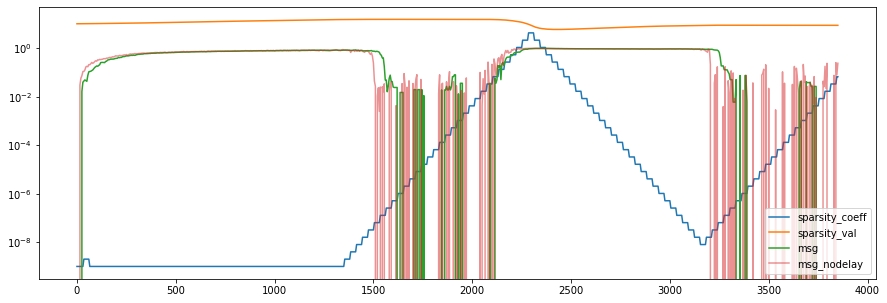

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00041_41__gin__freq__choice=10,_gin__mult__uniform=0.54992_2021-03-09_17-00-26 4331


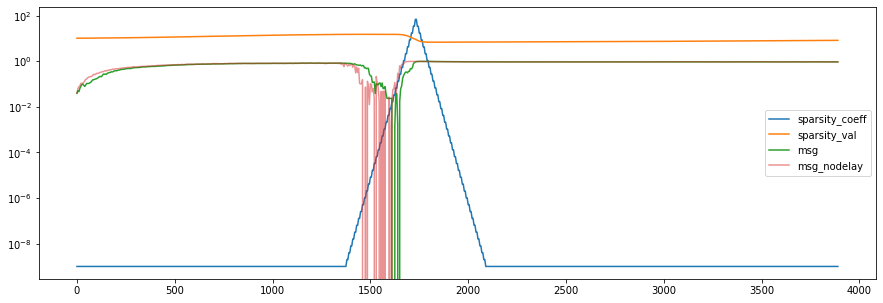

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00042_42__gin__freq__choice=10,_gin__mult__uniform=0.57878_2021-03-09_17-00-41 4416


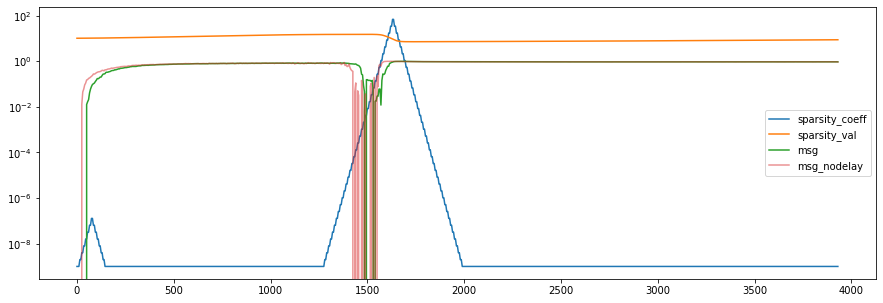

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00043_43__gin__freq__choice=70,_gin__mult__uniform=0.89763_2021-03-09_17-00-41 4235


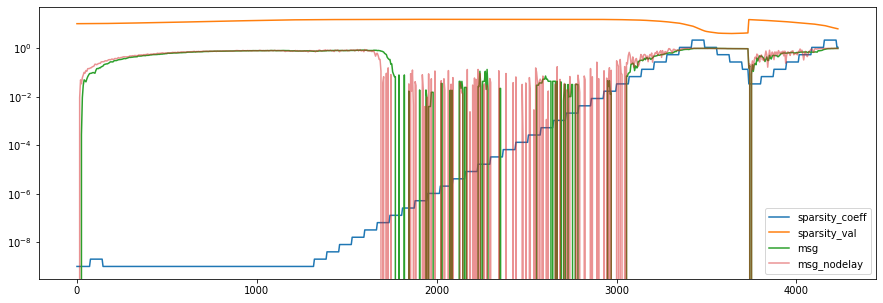

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00044_44__gin__freq__choice=300,_gin__mult__uniform=0.88698_2021-03-09_17-00-54 4349


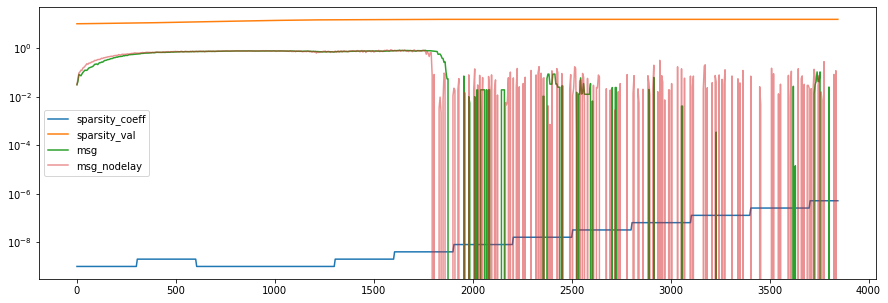

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00045_45__gin__freq__choice=50,_gin__mult__uniform=0.54537_2021-03-09_17-00-54 4146


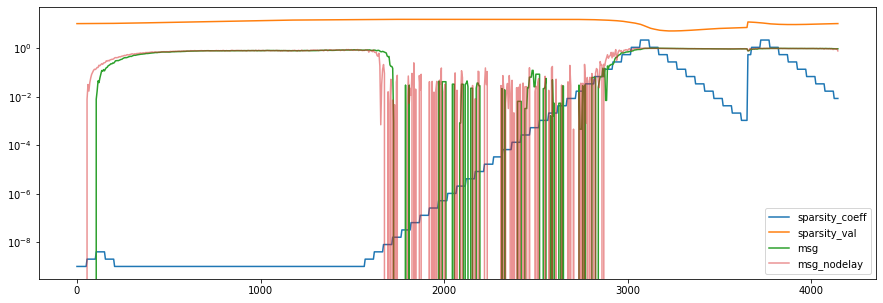

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00046_46__gin__freq__choice=70,_gin__mult__uniform=0.47713_2021-03-09_17-01-13 4272


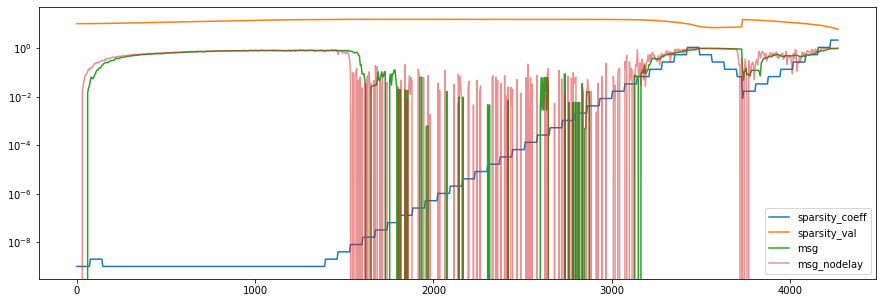

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00047_47__gin__freq__choice=50,_gin__mult__uniform=0.8837_2021-03-09_17-01-13 4311


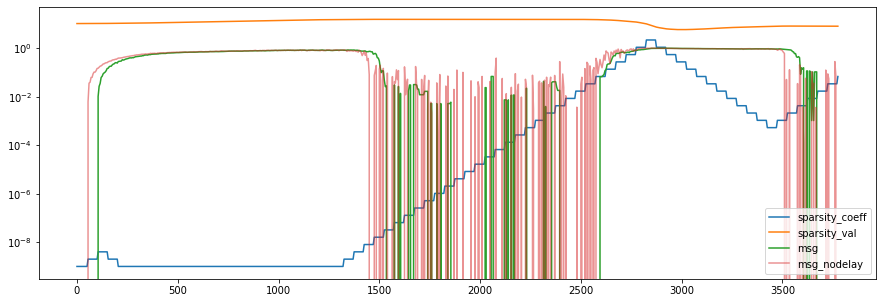

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00048_48__gin__freq__choice=50,_gin__mult__uniform=0.71067_2021-03-09_17-01-36 4217


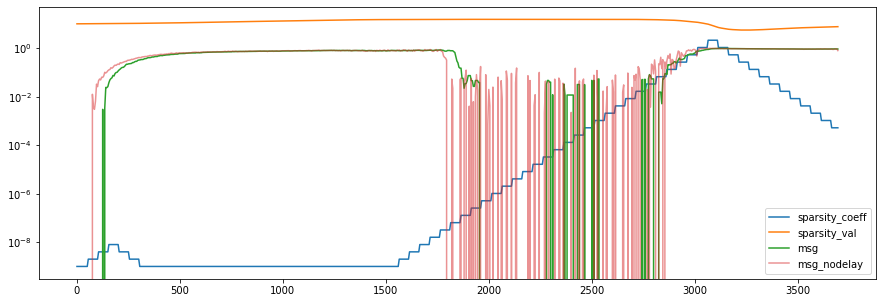

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00049_49__gin__freq__choice=100,_gin__mult__uniform=0.14659_2021-03-09_17-01-36 4294


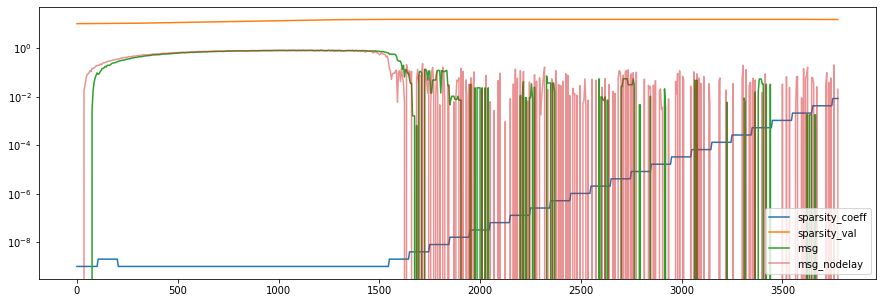

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00050_50__gin__freq__choice=300,_gin__mult__uniform=0.38453_2021-03-09_17-01-44 4278


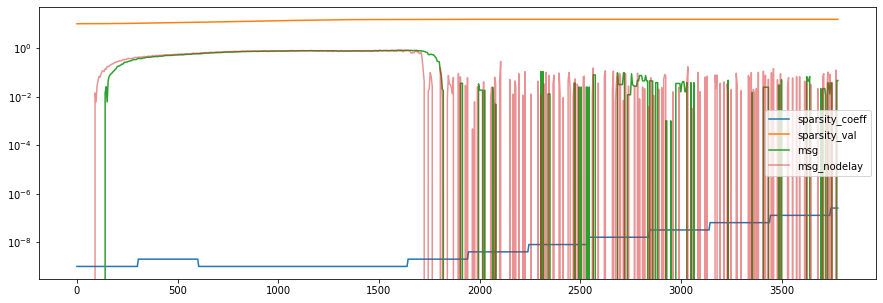

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00051_51__gin__freq__choice=70,_gin__mult__uniform=0.22916_2021-03-09_17-01-44 4274


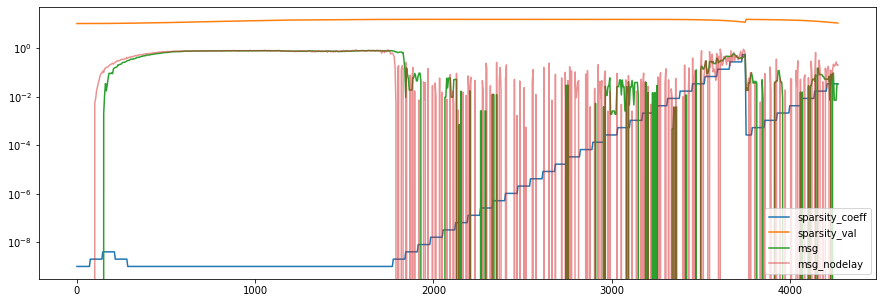

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00052_52__gin__freq__choice=100,_gin__mult__uniform=0.76329_2021-03-09_17-01-56 4241


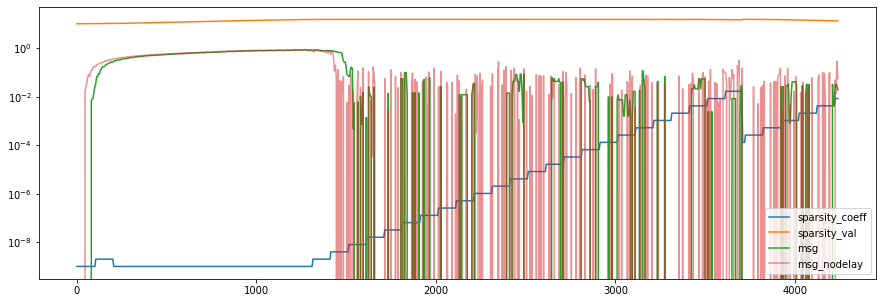

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00053_53__gin__freq__choice=300,_gin__mult__uniform=0.70846_2021-03-09_17-01-56 4317


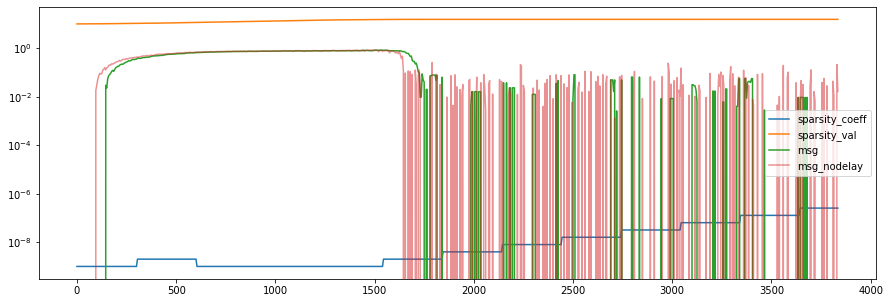

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00054_54__gin__freq__choice=300,_gin__mult__uniform=0.42299_2021-03-09_17-02-03 4379


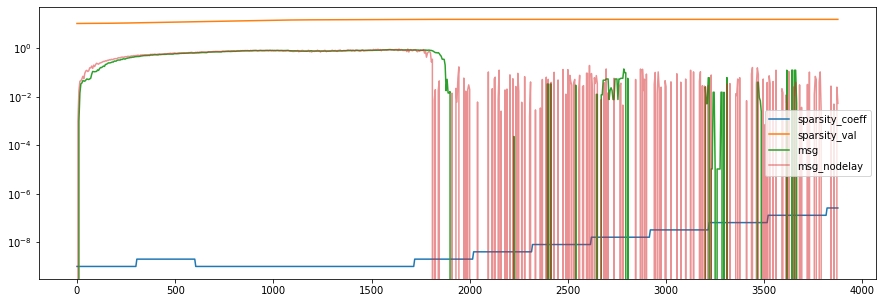

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00055_55__gin__freq__choice=30,_gin__mult__uniform=0.50883_2021-03-09_17-02-03 4291


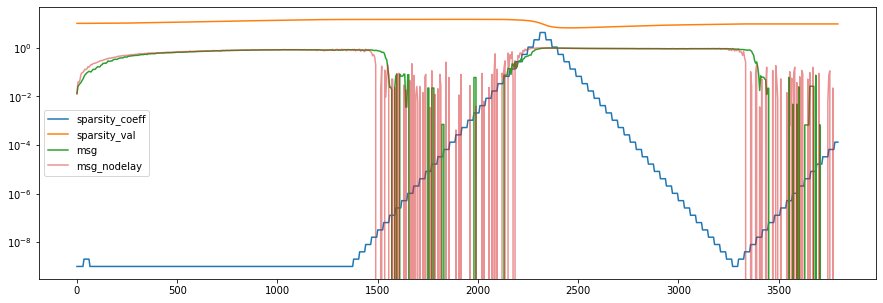

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00056_56__gin__freq__choice=50,_gin__mult__uniform=0.63745_2021-03-09_17-02-25 4291


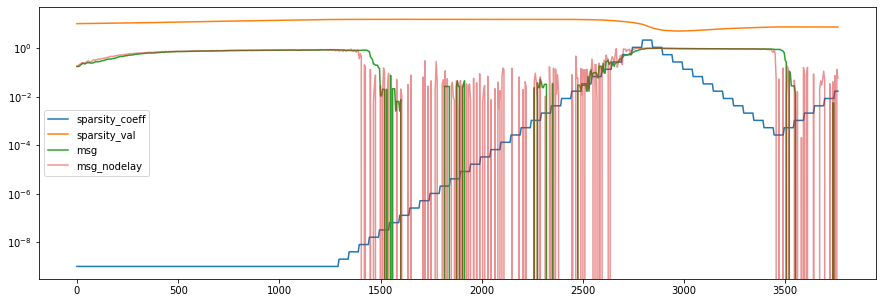

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00057_57__gin__freq__choice=70,_gin__mult__uniform=0.8166_2021-03-09_17-02-25 4269


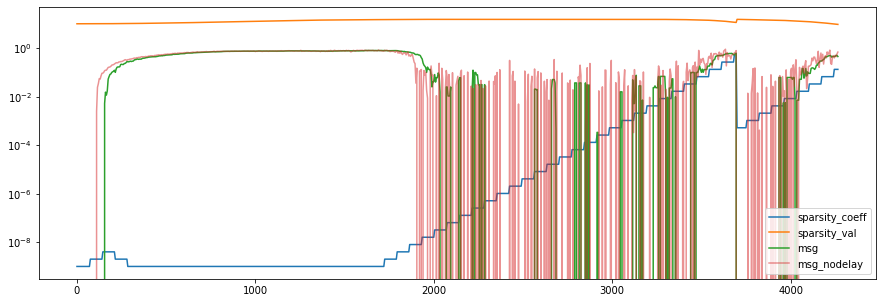

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00058_58__gin__freq__choice=100,_gin__mult__uniform=0.65986_2021-03-09_17-02-53 4338


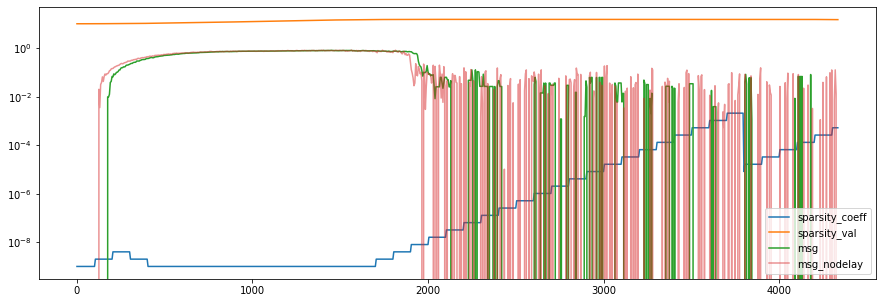

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00059_59__gin__freq__choice=200,_gin__mult__uniform=0.6987_2021-03-09_17-02-53 4175


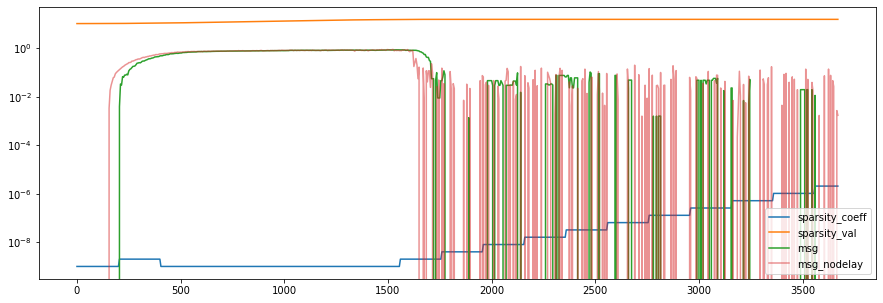

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00060_60__gin__freq__choice=10,_gin__mult__uniform=0.23164_2021-03-09_17-03-13 4328


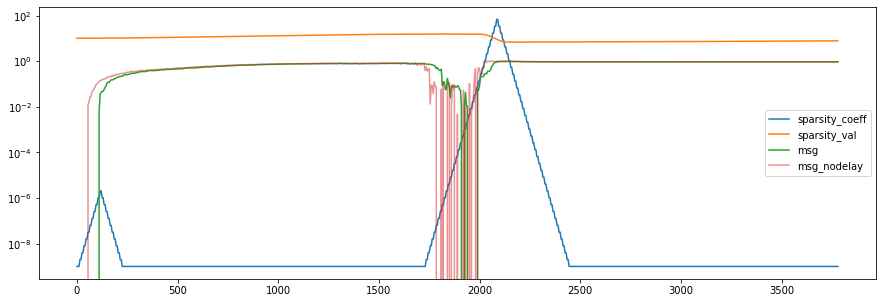

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00061_61__gin__freq__choice=400,_gin__mult__uniform=0.11142_2021-03-09_17-03-13 4062


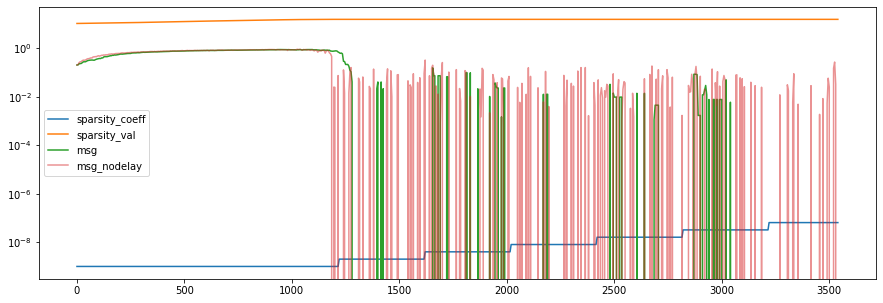

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00062_62__gin__freq__choice=70,_gin__mult__uniform=0.2033_2021-03-09_17-03-25 4104


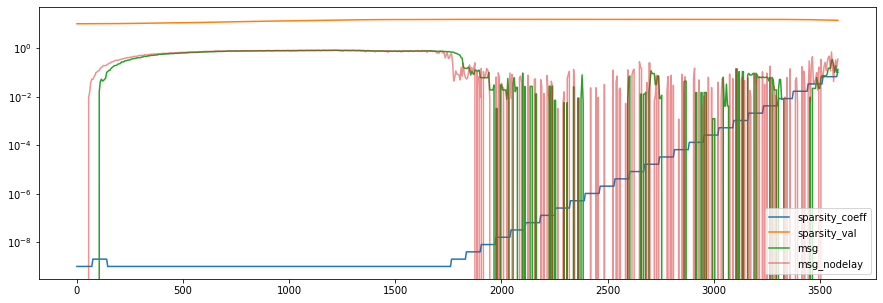

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00063_63__gin__freq__choice=300,_gin__mult__uniform=0.54949_2021-03-09_17-03-25 4122


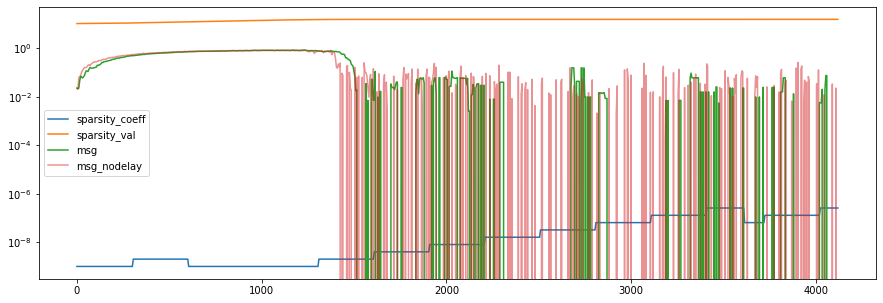

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00064_64__gin__freq__choice=50,_gin__mult__uniform=0.78097_2021-03-09_17-04-56 0
/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_25e54_00065_65__gin__freq__choice=70,_gin__mult__uniform=0.62604_2021-03-09_17-04-56 0
/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00000_0__gin__freq__choice=70,_gin__mult__uniform=0.21909_2021-03-09_00-30-08 6000


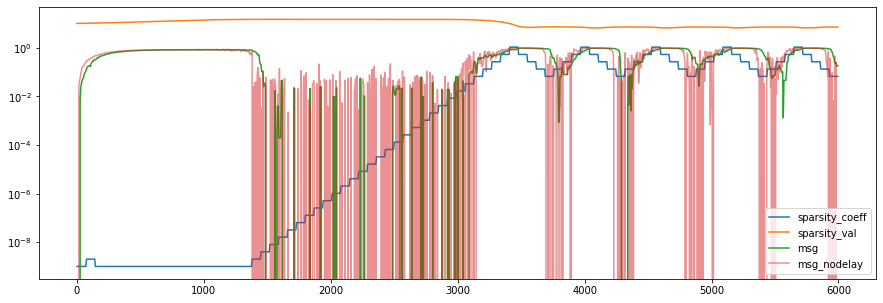

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00001_1__gin__freq__choice=30,_gin__mult__uniform=0.47962_2021-03-09_00-30-08 6000


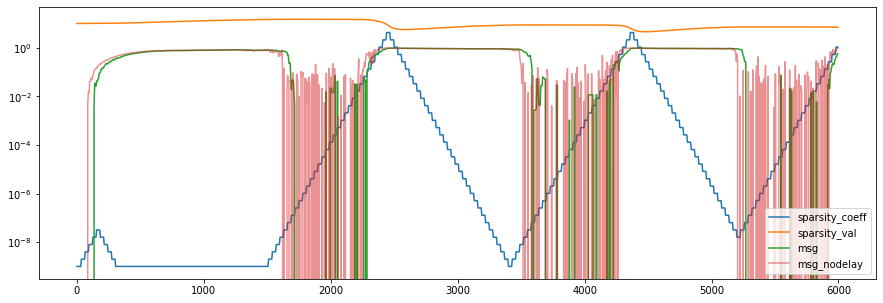

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00002_2__gin__freq__choice=200,_gin__mult__uniform=0.3164_2021-03-09_00-30-08 6000


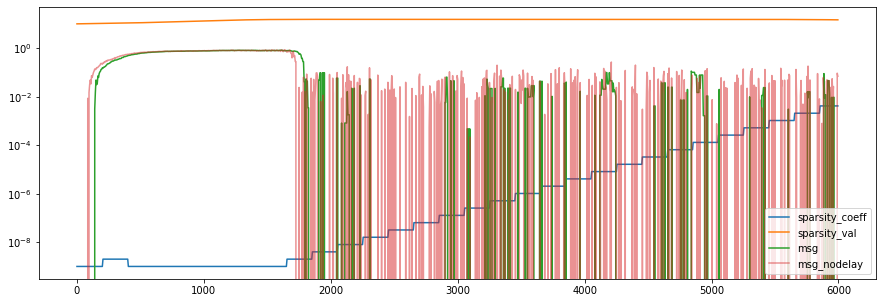

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00003_3__gin__freq__choice=10,_gin__mult__uniform=0.85069_2021-03-09_00-30-08 6000


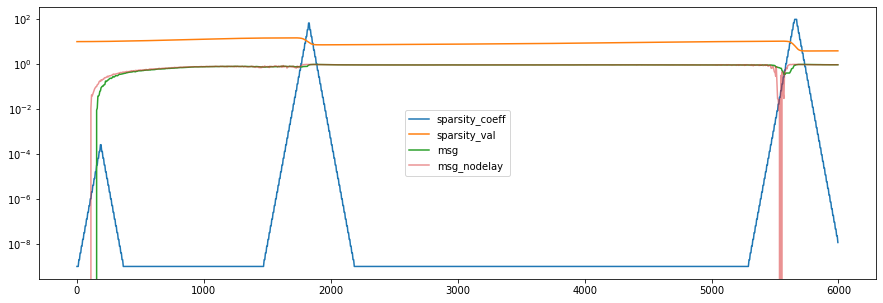

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00004_4__gin__freq__choice=300,_gin__mult__uniform=0.72179_2021-03-09_00-30-08 6000


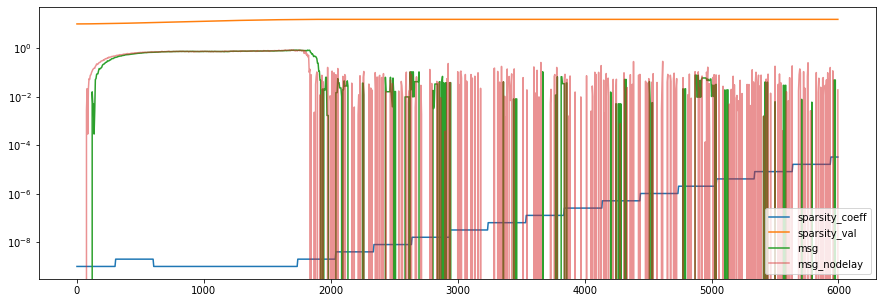

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00005_5__gin__freq__choice=30,_gin__mult__uniform=0.63169_2021-03-09_00-30-08 6000


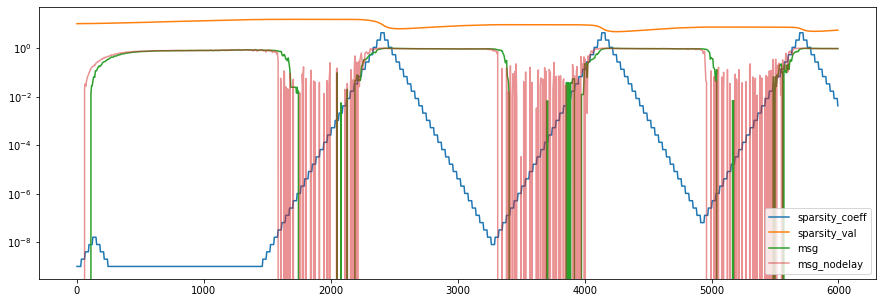

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00006_6__gin__freq__choice=10,_gin__mult__uniform=0.50204_2021-03-09_00-30-08 6000


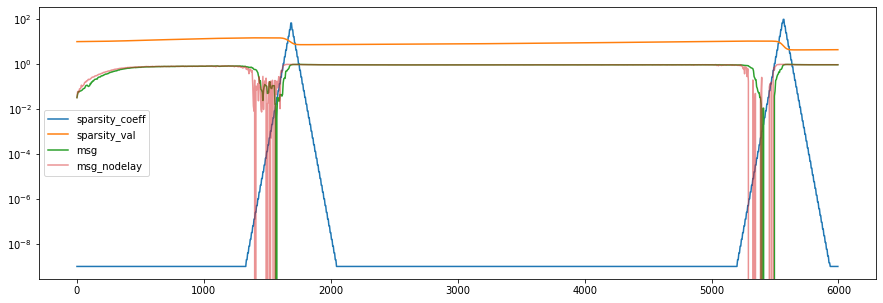

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00007_7__gin__freq__choice=200,_gin__mult__uniform=0.4306_2021-03-09_00-30-08 6000


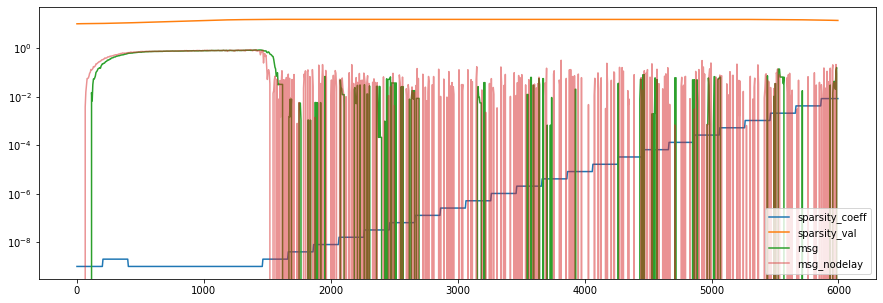

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00008_8__gin__freq__choice=30,_gin__mult__uniform=0.3553_2021-03-09_00-30-08 6000


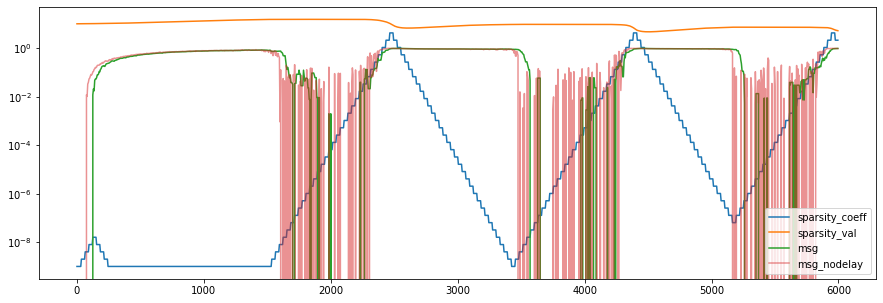

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00009_9__gin__freq__choice=100,_gin__mult__uniform=0.3908_2021-03-09_00-30-08 6000


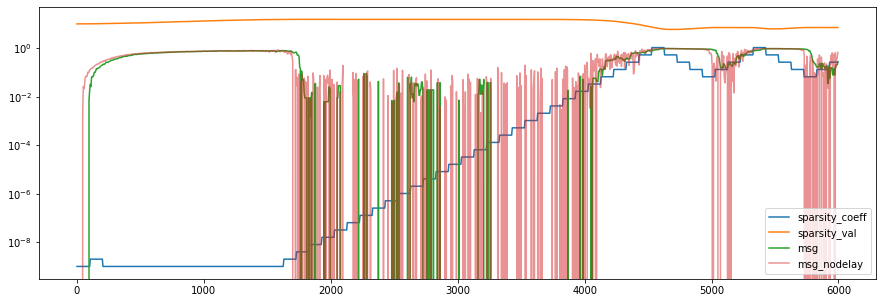

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00010_10__gin__freq__choice=200,_gin__mult__uniform=0.63792_2021-03-09_00-30-08 6000


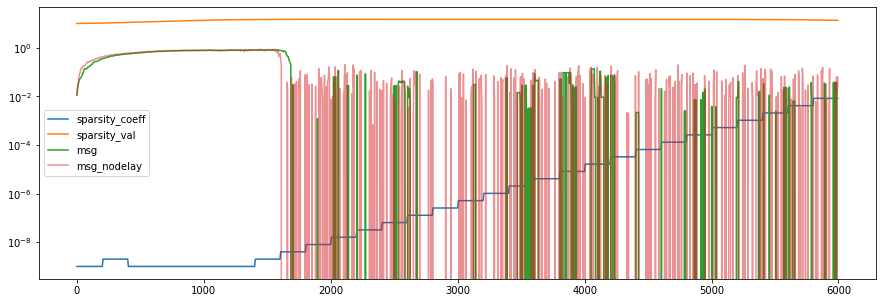

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00011_11__gin__freq__choice=30,_gin__mult__uniform=0.60453_2021-03-09_00-30-08 6000


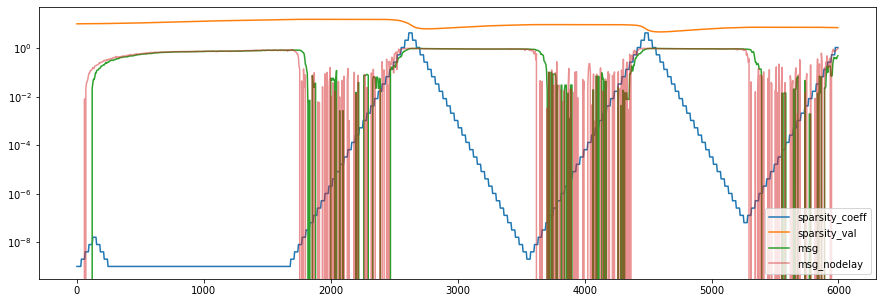

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00012_12__gin__freq__choice=70,_gin__mult__uniform=0.6274_2021-03-09_00-30-08 6000


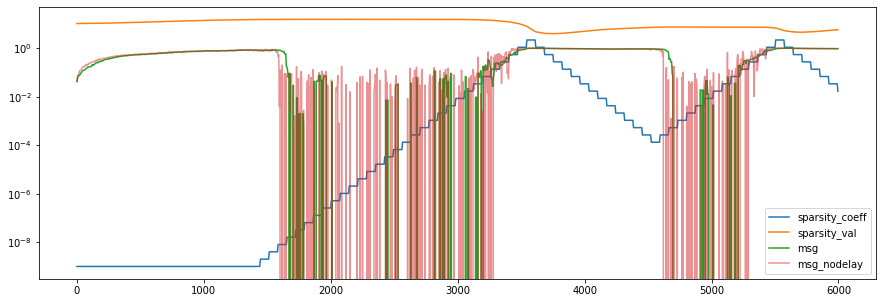

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00013_13__gin__freq__choice=200,_gin__mult__uniform=0.84174_2021-03-09_00-30-08 6000


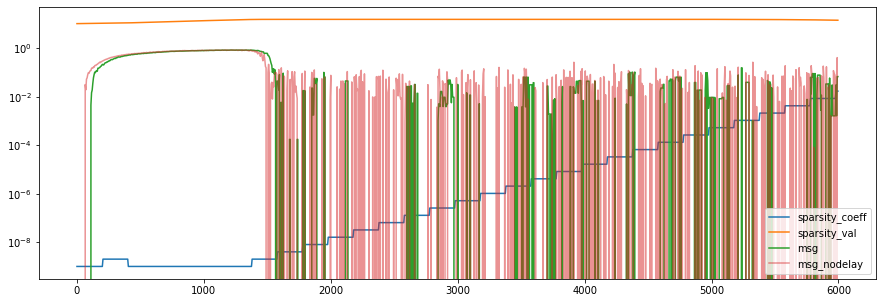

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00014_14__gin__freq__choice=30,_gin__mult__uniform=0.17799_2021-03-09_00-30-08 6000


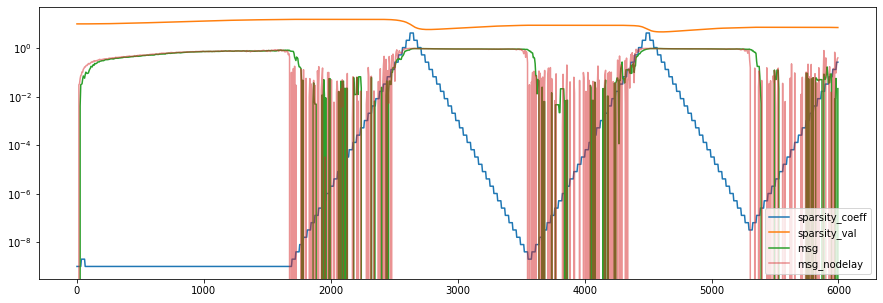

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00015_15__gin__freq__choice=400,_gin__mult__uniform=0.22179_2021-03-09_00-30-08 6000


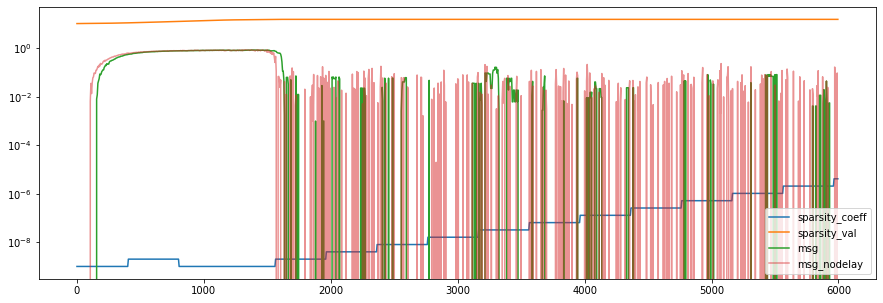

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00016_16__gin__freq__choice=300,_gin__mult__uniform=0.40256_2021-03-09_00-30-08 6000


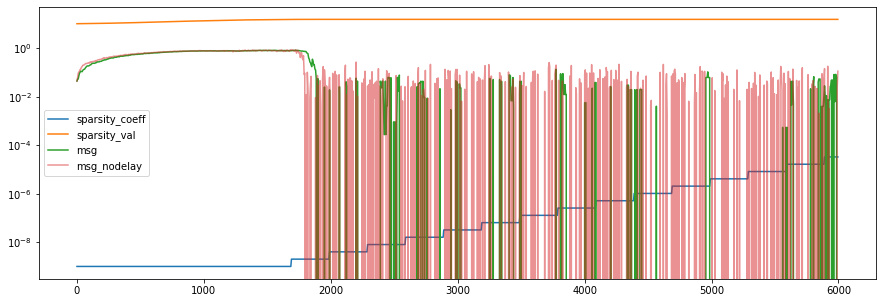

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00017_17__gin__freq__choice=400,_gin__mult__uniform=0.23823_2021-03-09_00-30-08 6000


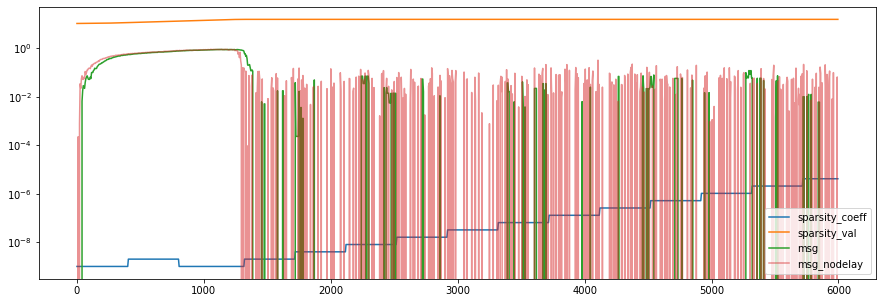

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00018_18__gin__freq__choice=30,_gin__mult__uniform=0.645_2021-03-09_00-30-08 6000


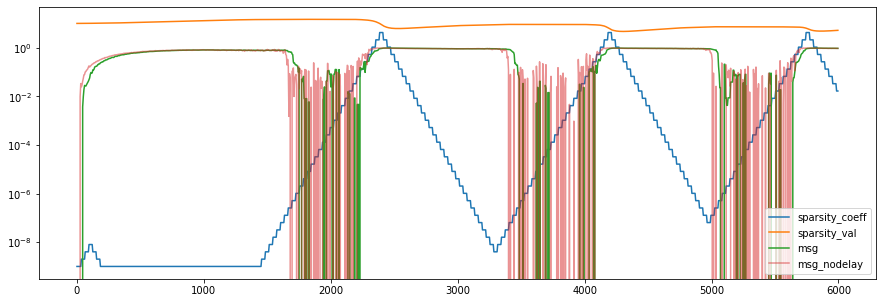

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00019_19__gin__freq__choice=200,_gin__mult__uniform=0.33888_2021-03-09_00-30-08 6000


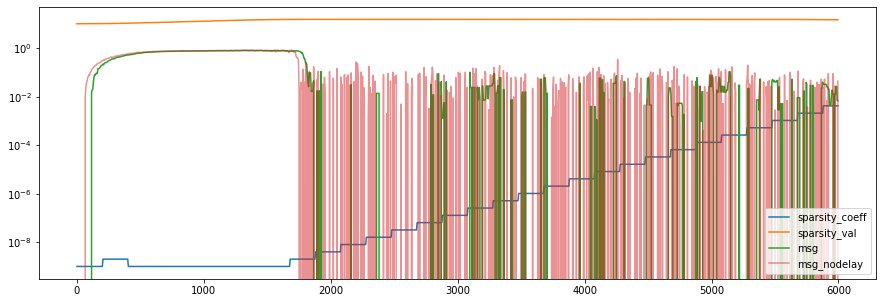

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00020_20__gin__freq__choice=70,_gin__mult__uniform=0.74443_2021-03-09_00-30-08 6000


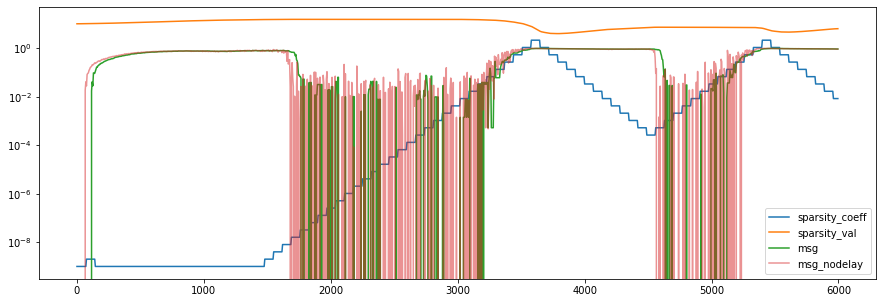

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00021_21__gin__freq__choice=50,_gin__mult__uniform=0.43576_2021-03-09_00-30-08 6000


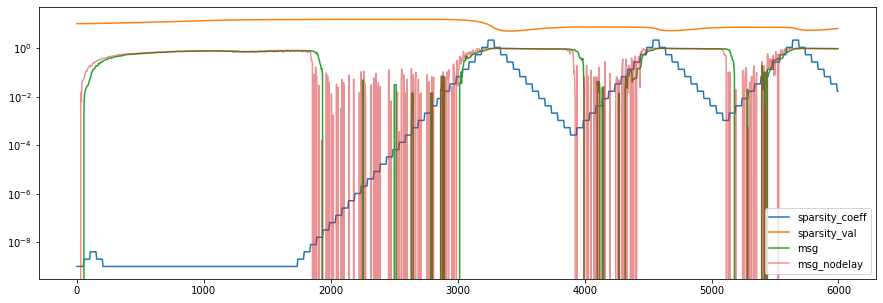

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00022_22__gin__freq__choice=70,_gin__mult__uniform=0.7221_2021-03-09_00-30-08 6000


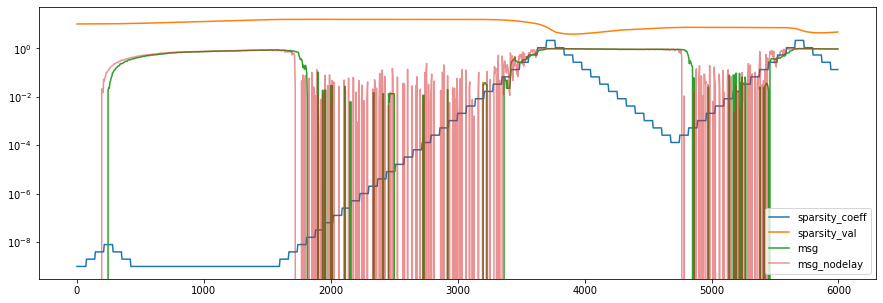

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00023_23__gin__freq__choice=10,_gin__mult__uniform=0.24112_2021-03-09_00-30-08 6000


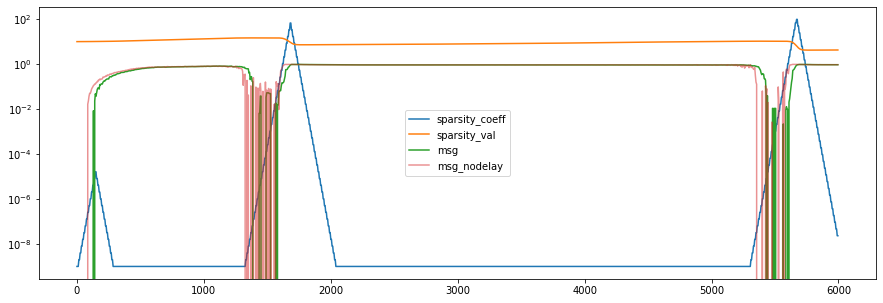

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00024_24__gin__freq__choice=10,_gin__mult__uniform=0.11249_2021-03-09_00-30-08 6000


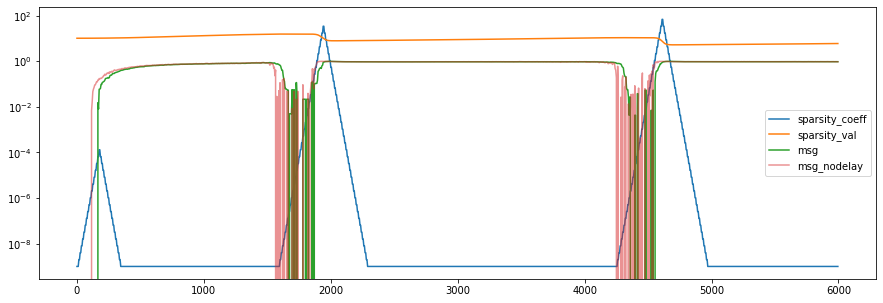

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00025_25__gin__freq__choice=400,_gin__mult__uniform=0.63281_2021-03-09_00-30-08 6000


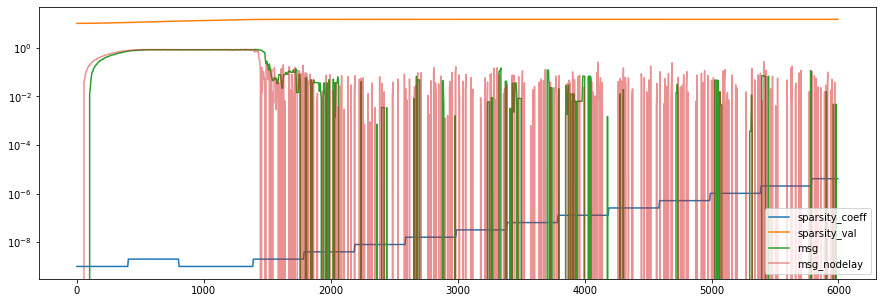

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00026_26__gin__freq__choice=10,_gin__mult__uniform=0.33384_2021-03-09_00-30-08 6000


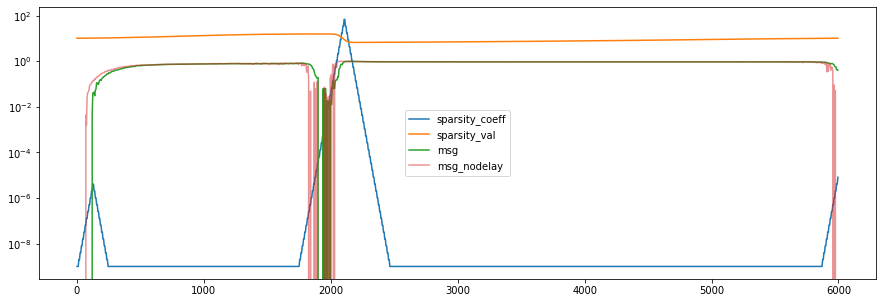

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00027_27__gin__freq__choice=50,_gin__mult__uniform=0.24954_2021-03-09_00-30-08 6000


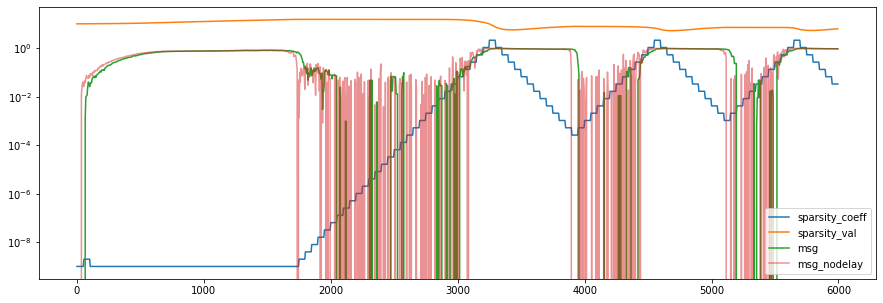

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00028_28__gin__freq__choice=10,_gin__mult__uniform=0.39751_2021-03-09_00-30-08 6000


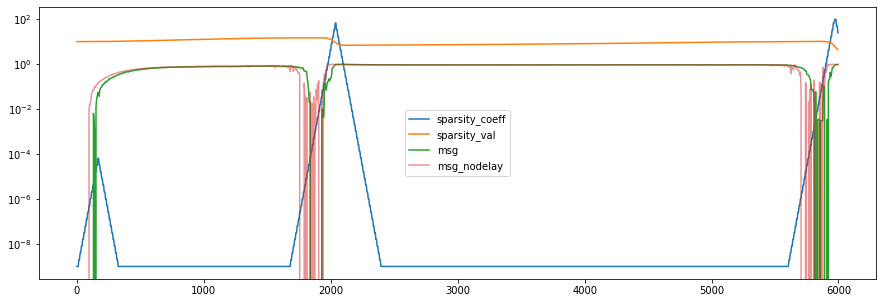

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00029_29__gin__freq__choice=30,_gin__mult__uniform=0.87014_2021-03-09_00-30-08 6000


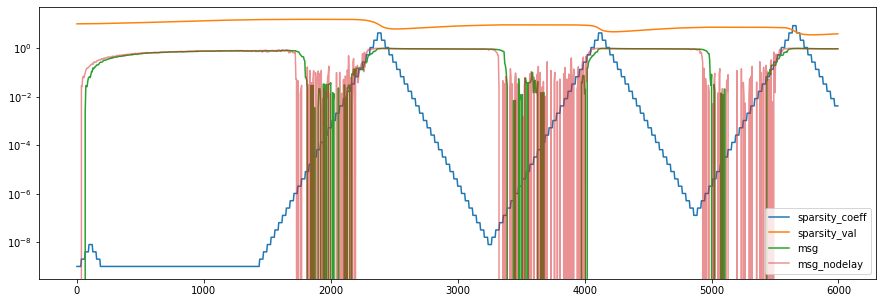

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00030_30__gin__freq__choice=50,_gin__mult__uniform=0.43956_2021-03-09_00-30-08 6000


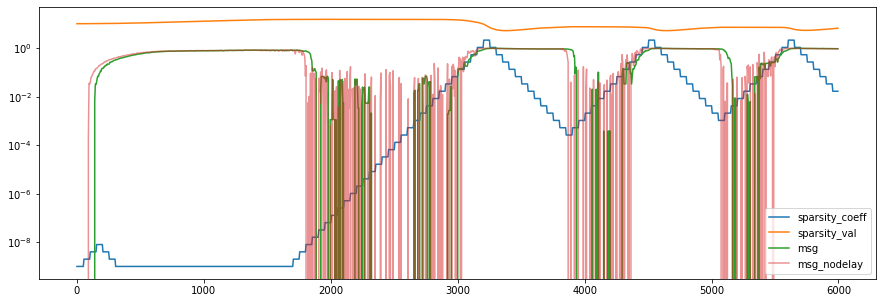

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00031_31__gin__freq__choice=400,_gin__mult__uniform=0.77374_2021-03-09_00-30-08 6000


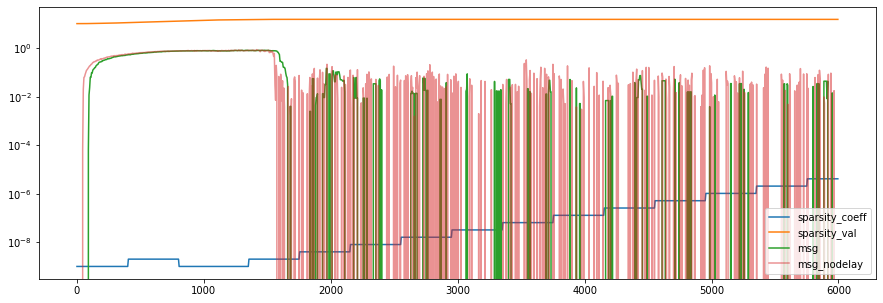

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00032_32__gin__freq__choice=10,_gin__mult__uniform=0.44594_2021-03-09_00-30-08 6000


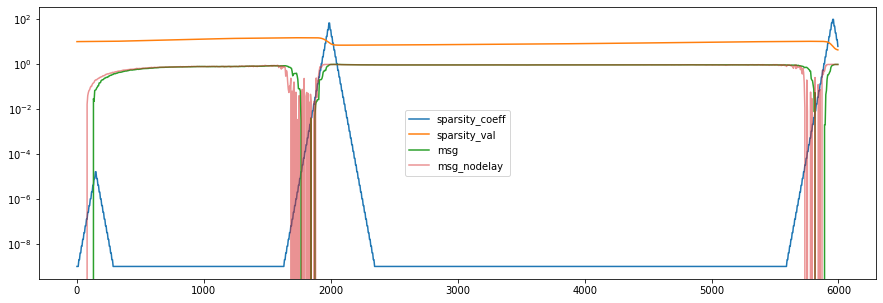

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00033_33__gin__freq__choice=200,_gin__mult__uniform=0.56178_2021-03-09_00-30-08 6000


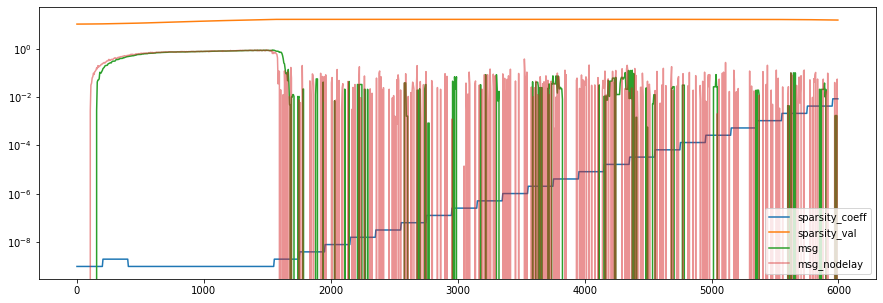

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00034_34__gin__freq__choice=400,_gin__mult__uniform=0.61758_2021-03-09_01-46-39 6000


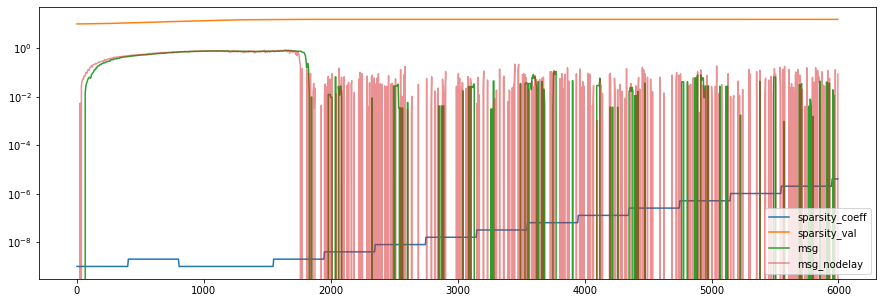

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00035_35__gin__freq__choice=50,_gin__mult__uniform=0.55642_2021-03-09_01-46-39 6000


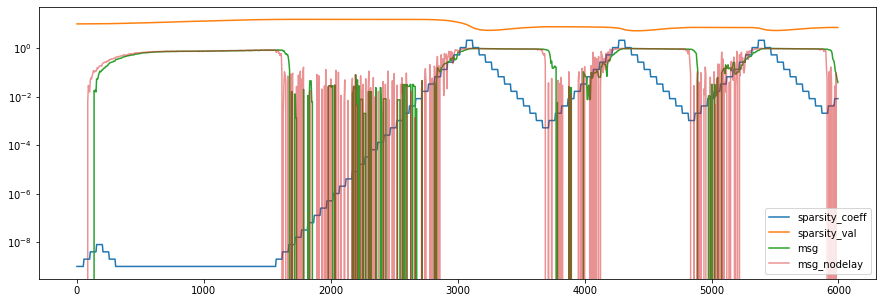

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00036_36__gin__freq__choice=400,_gin__mult__uniform=0.57249_2021-03-09_01-48-26 6000


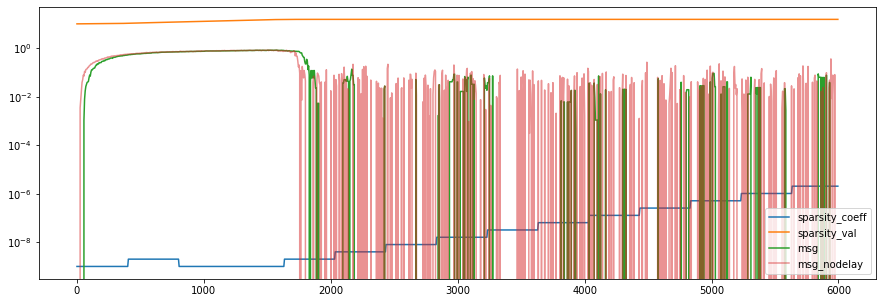

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00037_37__gin__freq__choice=400,_gin__mult__uniform=0.69883_2021-03-09_01-48-26 6000


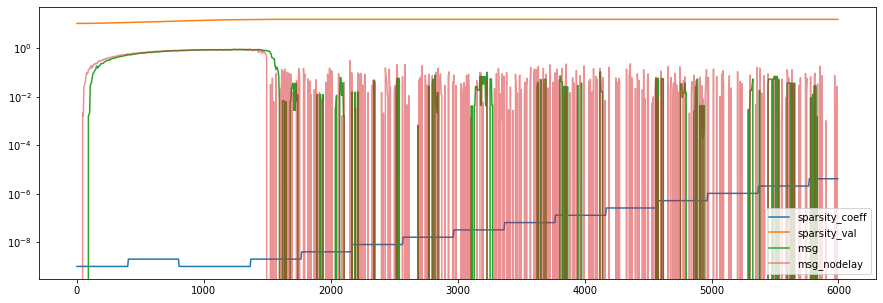

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00038_38__gin__freq__choice=10,_gin__mult__uniform=0.85112_2021-03-09_01-48-38 6000


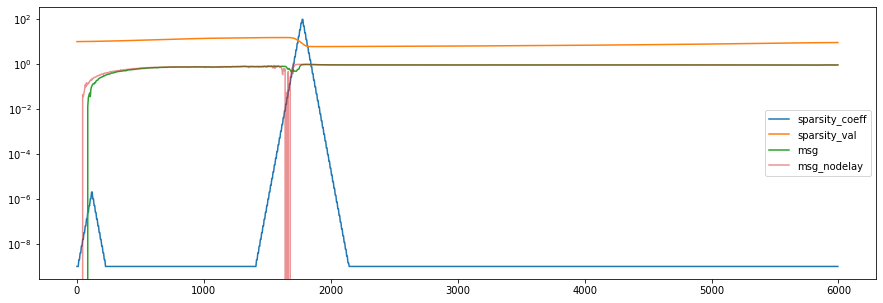

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00039_39__gin__freq__choice=200,_gin__mult__uniform=0.1925_2021-03-09_01-48-38 6000


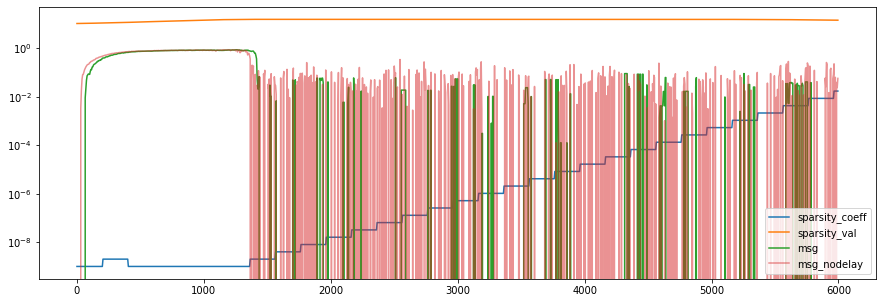

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00040_40__gin__freq__choice=30,_gin__mult__uniform=0.81295_2021-03-09_01-48-56 6000


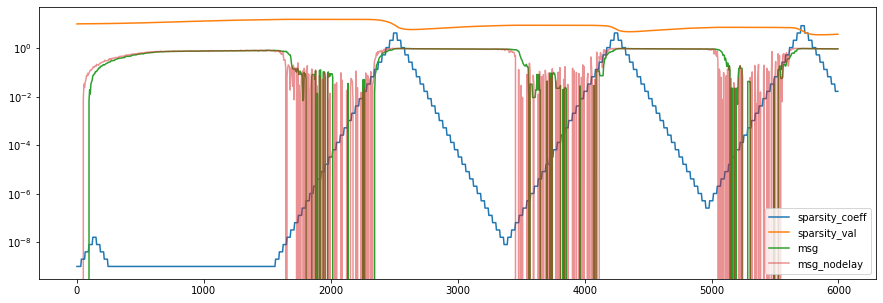

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00041_41__gin__freq__choice=200,_gin__mult__uniform=0.2119_2021-03-09_01-48-56 6000


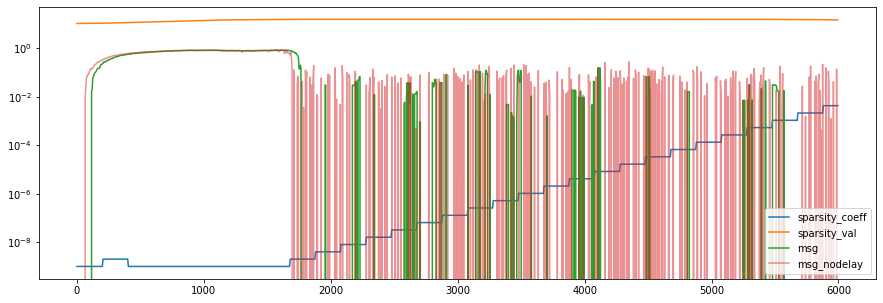

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00042_42__gin__freq__choice=70,_gin__mult__uniform=0.28958_2021-03-09_01-48-59 6000


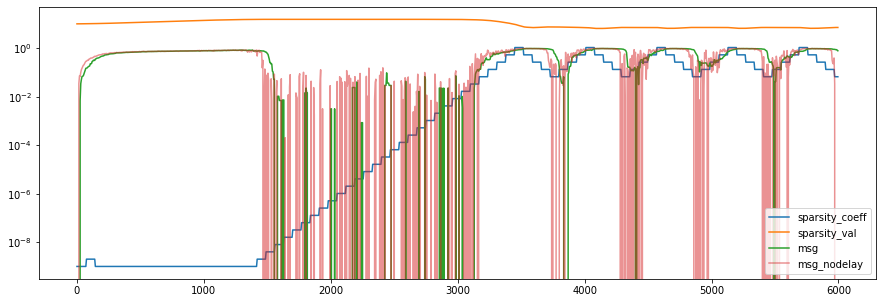

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00043_43__gin__freq__choice=200,_gin__mult__uniform=0.53231_2021-03-09_01-48-59 6000


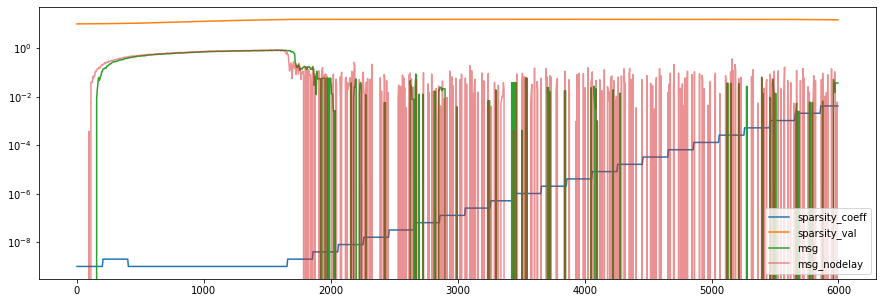

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00044_44__gin__freq__choice=100,_gin__mult__uniform=0.79487_2021-03-09_01-49-09 6000


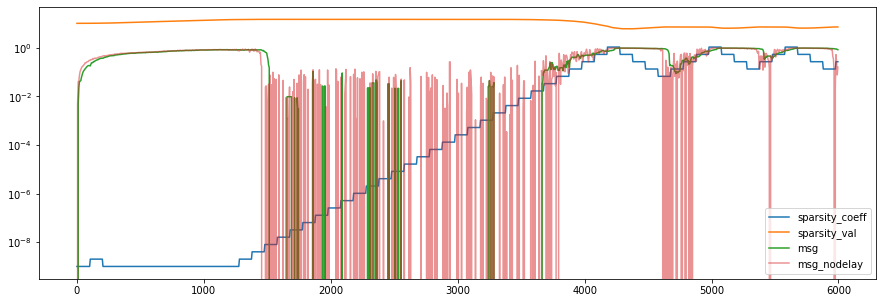

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00045_45__gin__freq__choice=300,_gin__mult__uniform=0.67937_2021-03-09_01-49-09 6000


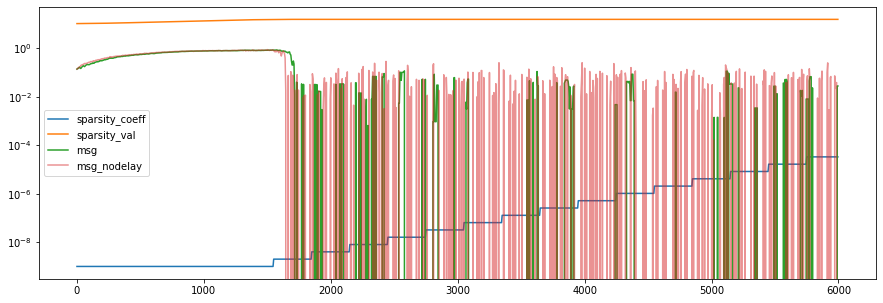

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00046_46__gin__freq__choice=400,_gin__mult__uniform=0.48356_2021-03-09_01-49-17 6000


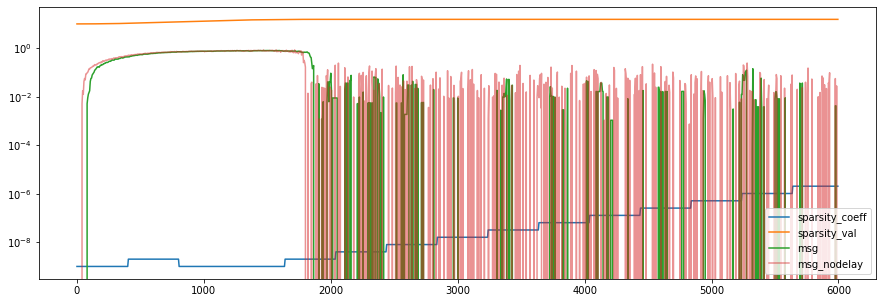

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00047_47__gin__freq__choice=200,_gin__mult__uniform=0.20584_2021-03-09_01-49-17 6000


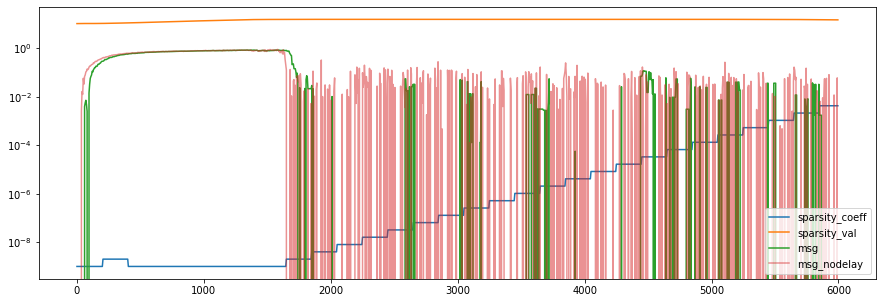

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00048_48__gin__freq__choice=200,_gin__mult__uniform=0.69674_2021-03-09_01-49-38 6000


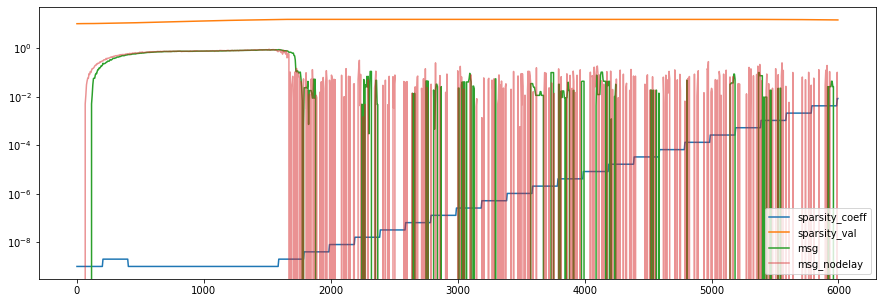

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00049_49__gin__freq__choice=200,_gin__mult__uniform=0.72106_2021-03-09_01-49-38 6000


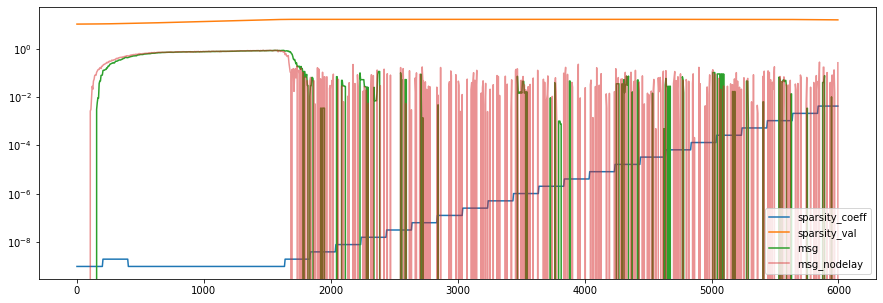

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00050_50__gin__freq__choice=50,_gin__mult__uniform=0.8609_2021-03-09_01-49-47 6000


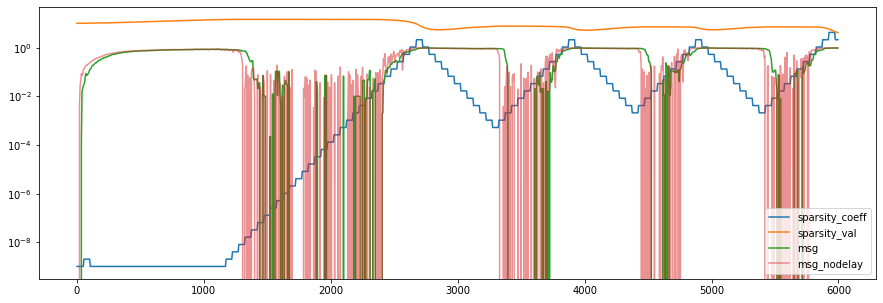

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00051_51__gin__freq__choice=30,_gin__mult__uniform=0.65775_2021-03-09_01-49-47 6000


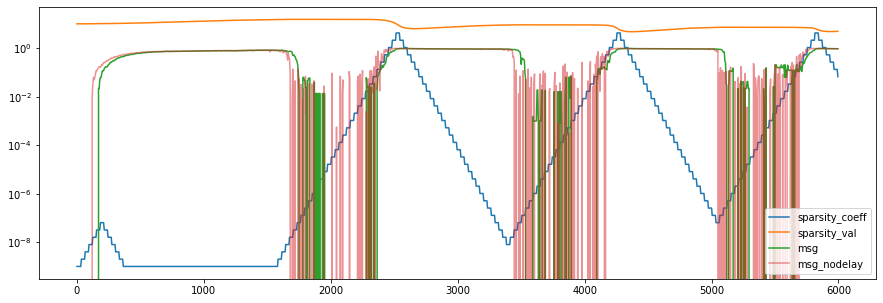

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00052_52__gin__freq__choice=200,_gin__mult__uniform=0.49417_2021-03-09_01-50-00 6000


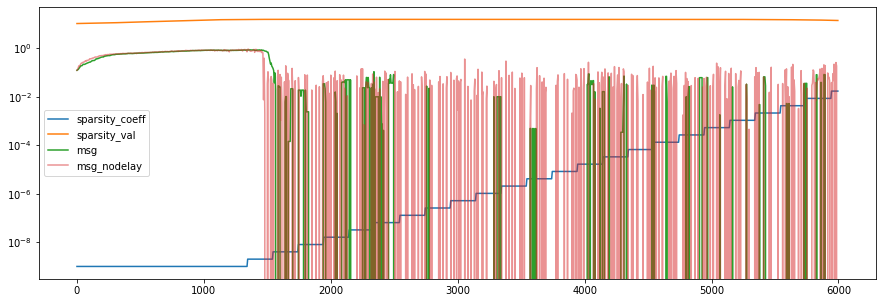

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00053_53__gin__freq__choice=10,_gin__mult__uniform=0.46365_2021-03-09_01-50-00 6000


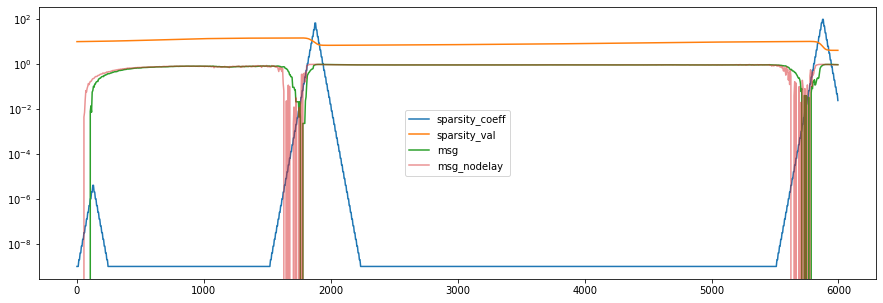

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00054_54__gin__freq__choice=100,_gin__mult__uniform=0.24505_2021-03-09_01-50-39 6000


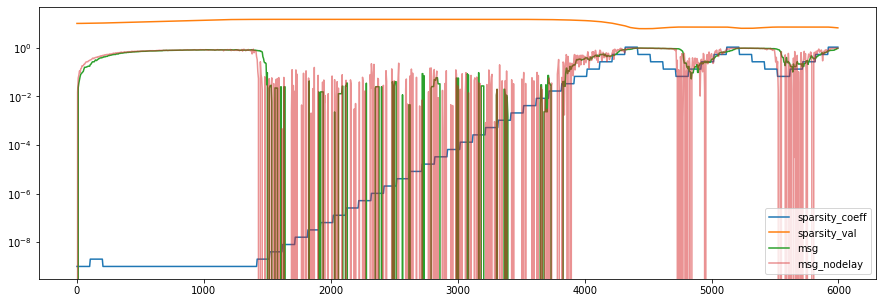

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00055_55__gin__freq__choice=70,_gin__mult__uniform=0.28247_2021-03-09_01-50-39 6000


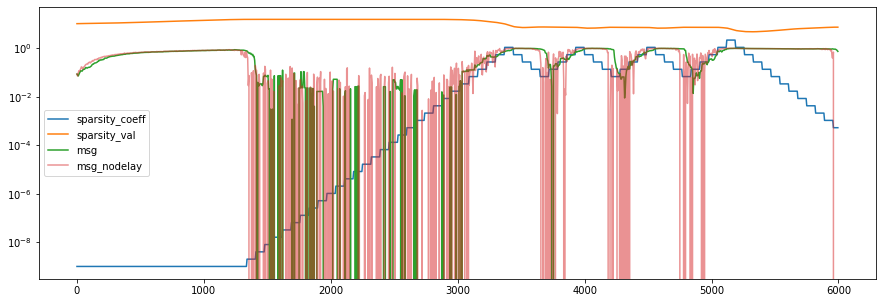

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00056_56__gin__freq__choice=10,_gin__mult__uniform=0.14041_2021-03-09_01-50-56 6000


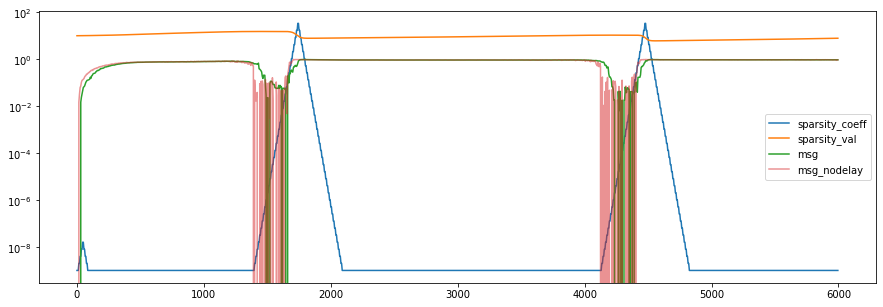

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00057_57__gin__freq__choice=100,_gin__mult__uniform=0.3326_2021-03-09_01-50-56 6000


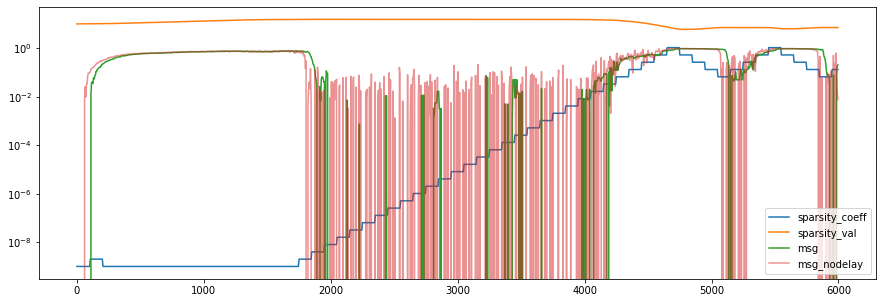

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00058_58__gin__freq__choice=10,_gin__mult__uniform=0.88773_2021-03-09_01-51-06 6000


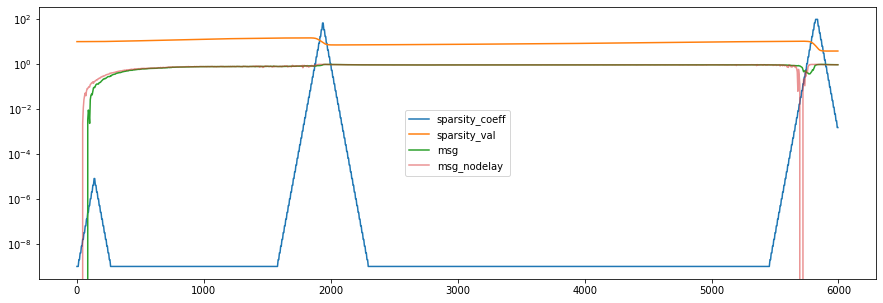

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00059_59__gin__freq__choice=100,_gin__mult__uniform=0.33198_2021-03-09_01-51-06 6000


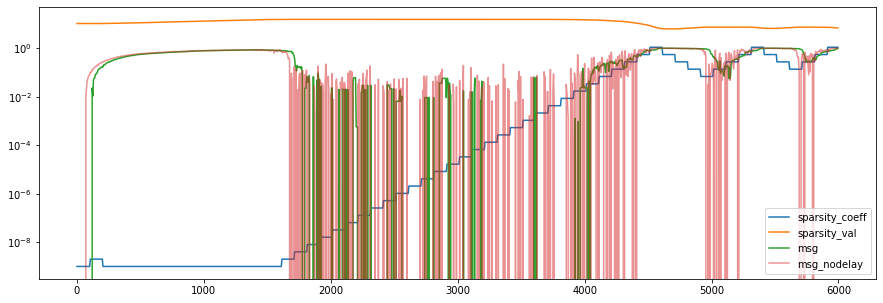

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00060_60__gin__freq__choice=100,_gin__mult__uniform=0.84368_2021-03-09_01-51-38 6000


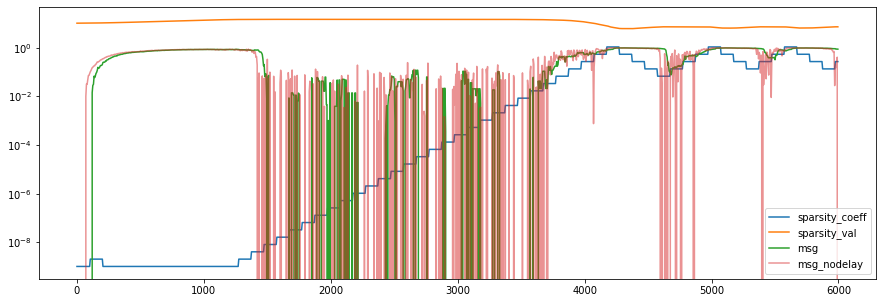

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00061_61__gin__freq__choice=400,_gin__mult__uniform=0.83706_2021-03-09_01-51-38 6000


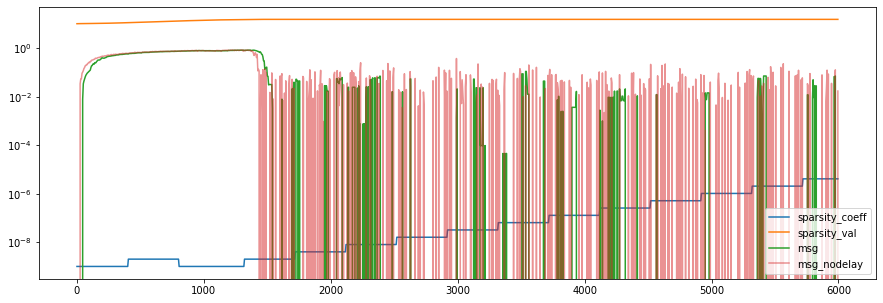

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00062_62__gin__freq__choice=10,_gin__mult__uniform=0.24153_2021-03-09_01-52-17 6000


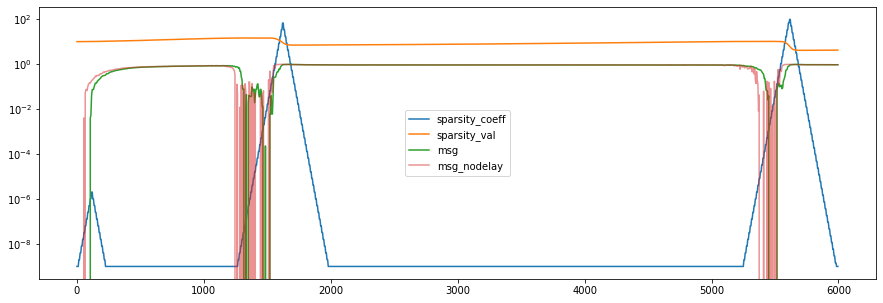

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00063_63__gin__freq__choice=70,_gin__mult__uniform=0.77116_2021-03-09_01-52-17 6000


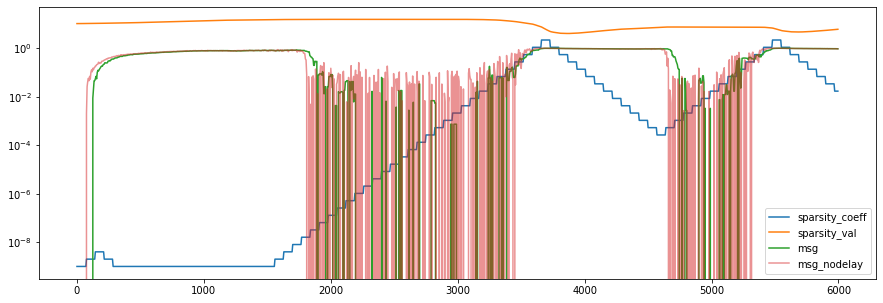

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00064_64__gin__freq__choice=30,_gin__mult__uniform=0.58059_2021-03-09_01-52-50 2217
/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00065_65__gin__freq__choice=70,_gin__mult__uniform=0.53313_2021-03-09_01-52-50 2165
/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00066_66__gin__freq__choice=30,_gin__mult__uniform=0.15353_2021-03-09_04-57-08 2149
/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00067_67__gin__freq__choice=200,_gin__mult__uniform=0.68232_2021-03-09_04-57-08 2141
/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_384dc_00068_68__gin

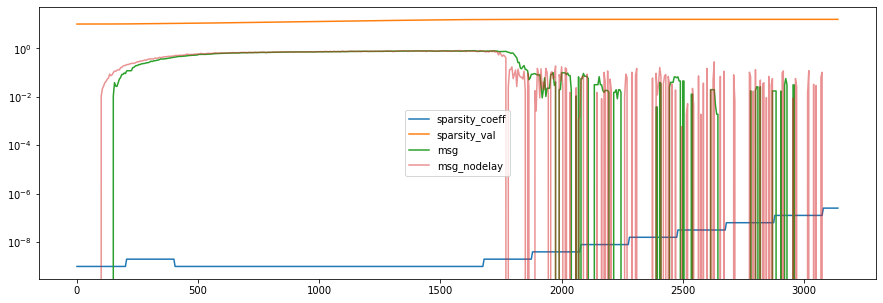

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_d0237_00001_1__gin__freq__choice=30,_gin__mult__uniform=0.72596_2021-03-08_23-58-35 3052


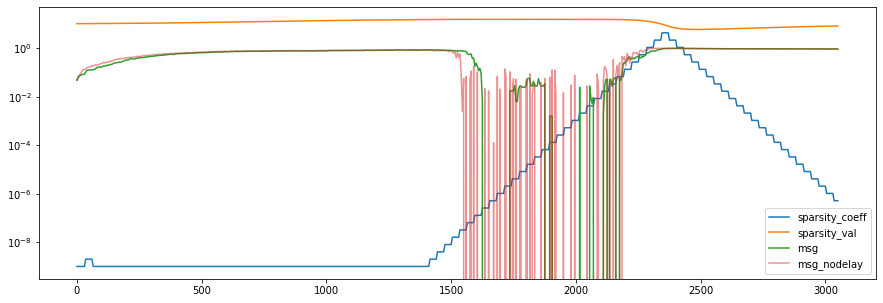

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_d0237_00002_2__gin__freq__choice=300,_gin__mult__uniform=0.79811_2021-03-08_23-58-35 3123


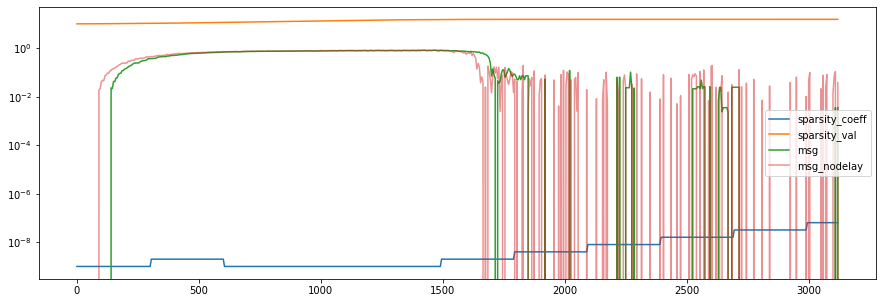

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_d0237_00003_3__gin__freq__choice=10,_gin__mult__uniform=0.20019_2021-03-08_23-58-35 3073


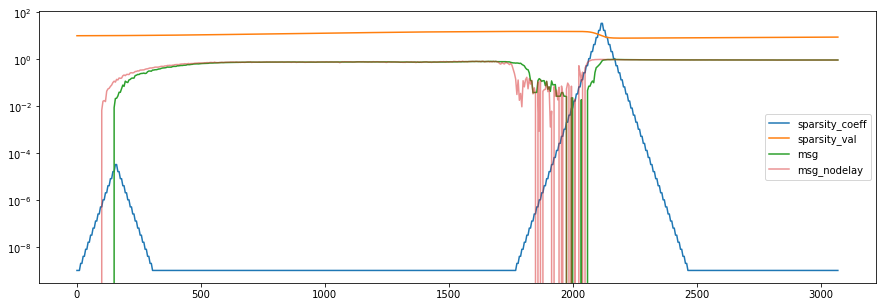

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_d0237_00004_4__gin__freq__choice=10,_gin__mult__uniform=0.15922_2021-03-08_23-58-35 3035


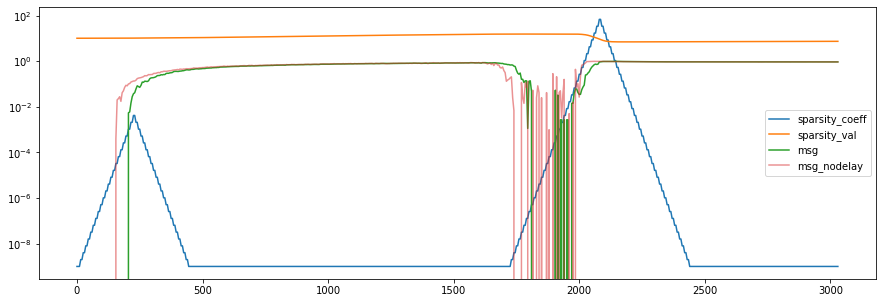

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_d0237_00005_5__gin__freq__choice=30,_gin__mult__uniform=0.60774_2021-03-08_23-58-35 3061


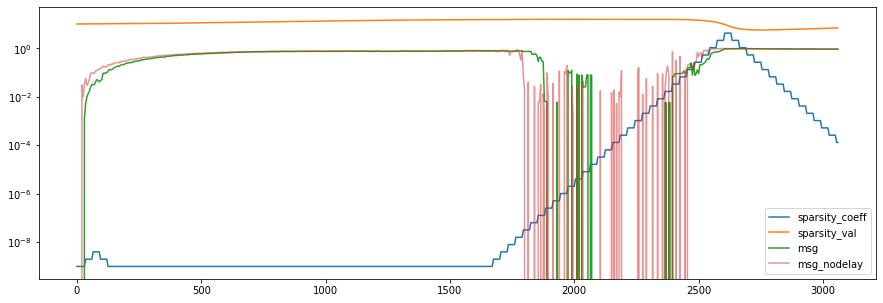

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_d0237_00006_6__gin__freq__choice=100,_gin__mult__uniform=0.4576_2021-03-08_23-58-35 3081


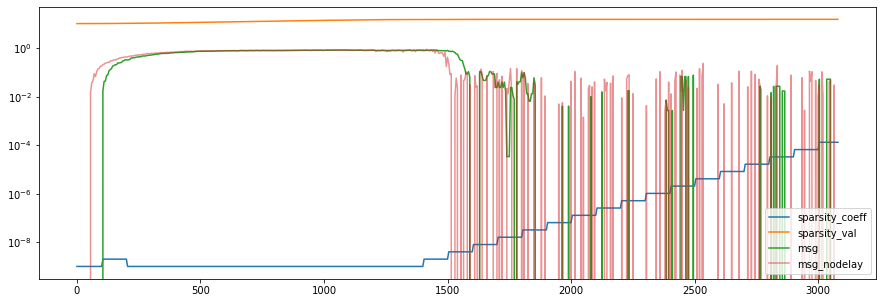

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_d0237_00007_7__gin__freq__choice=50,_gin__mult__uniform=0.57032_2021-03-08_23-58-35 2985


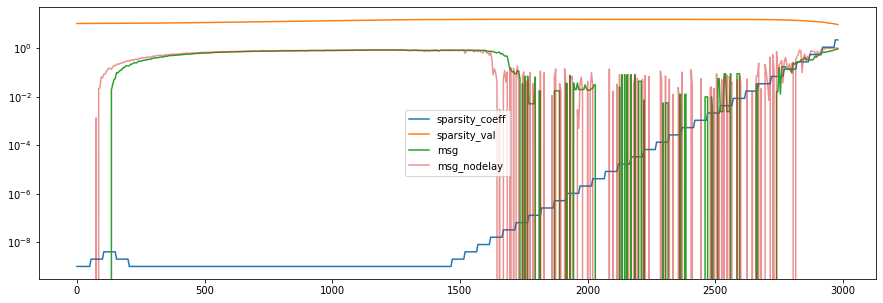

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_d0237_00008_8__gin__freq__choice=200,_gin__mult__uniform=0.22275_2021-03-08_23-58-35 3069


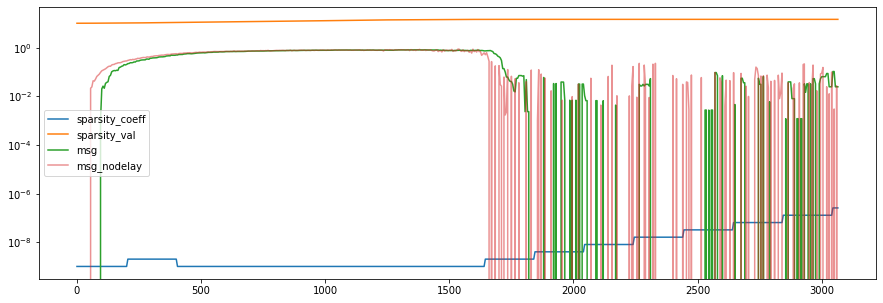

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_d0237_00009_9__gin__freq__choice=400,_gin__mult__uniform=0.65287_2021-03-08_23-58-35 3108


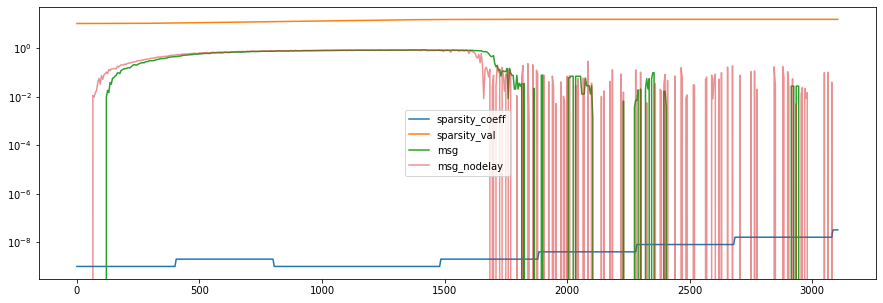

/home/sergei/ray_results/rl_const_sparsity_obs_space_env_sm5_with_adaptive_sparsity_threshold_search_annealer_freq/main_fcn_d0237_00010_10__gin__freq__choice=30,_gin__mult__uniform=0.17681_2021-03-08_23-58-35 3177


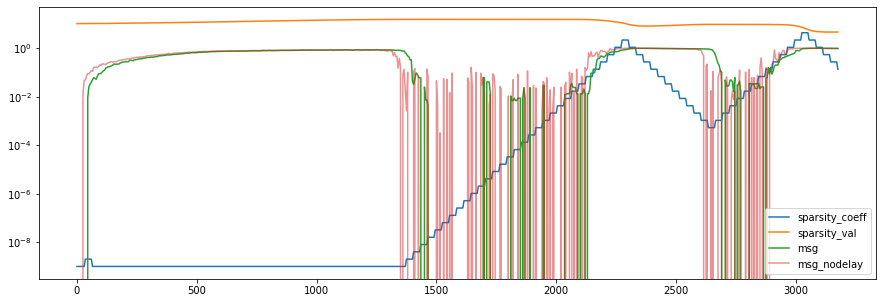

TypeError: object of type 'NoneType' has no len()

In [264]:
for trial, df1 in dfs.items():
    print(trial, len(df1))
    if len(df1) >= 2500:
        plot_trial_details(df1)

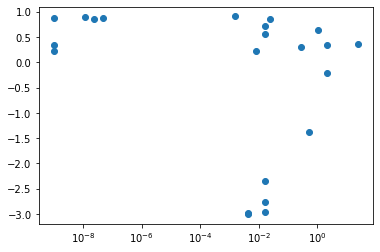

In [246]:
plt.scatter(df['losses/opt1/sparsity/coeff'][::5], df['metrics/|last_add_sparsity_gap'][::5])
plt.xscale('log')
# plt.yscale('log')

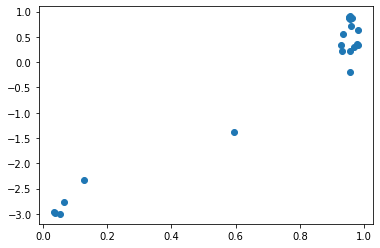

In [244]:
plt.scatter(df['metrics/|last_mult_sparsity_gap'][::5], df['metrics/|last_add_sparsity_gap'][::5])
# plt.xscale('log')
# plt.yscale('log')

In [162]:
def get_last_epoch(trial):
    """Get last row with epoch data."""
    try:
        df = get_df_from_logdir(trial, do_tqdm=False)
    except FileNotFoundError:
        return None
    except json.JSONDecodeError:
        return None
    if hasattr(df, 'epochs'):
        df = df[df.epochs==max(df.epochs)]
        return df.iloc[0]
    return None

df = [get_last_epoch(trial) for trial in tqdm(trials)]
df = pd.DataFrame([x for x in df if x is not None])
df.to_csv(f'{config_name}.csv', index=False)

In [210]:
df = pd.read_csv(f'{config_name}.csv')
df

epochs  n_samples  losses/opt1/fit/coeff  losses/opt1/fit/value  \
0    5995.0     1000.0                    0.2               1.533224   
1    5995.0     1000.0                    0.2               0.522995   
2    5995.0     1000.0                    0.2               0.022827   
3    5995.0     1000.0                    0.2               0.027203   
4    5995.0     1000.0                    0.2               7.870081   
..      ...        ...                    ...                    ...   
260  5995.0     1000.0                    0.2               0.133682   
261  5995.0     1000.0                    0.2               0.125558   
262  5995.0     1000.0                    0.2               0.057338   
263  1930.0     1000.0                    0.2               6.772610   
264  1875.0     1000.0                    0.2               0.024781   

     losses/opt1/sparsity/coeff  losses/opt1/sparsity/value  \
0                  2.684355e-01                    6.663239   
1                  2.097152e-03                    7.102400   
2                  4.194304e-03                   14.692704   
3                  2.684355e-01                    7.225594   
4                  6.103516e-03                    4.191093   
..                          ...                         ...   
260                2.097152e-03                    7.238510   
261                5.368709e-01                    7.201632   
262                4.096000e-06                   15.113548   
263                3.435974e+01                    8.460159   
264                2.000000e-09                   15.143829   

     losses/opt1/fit_all_on/coeff  losses/opt1/fit_all_on/value  \
0                            0.02                      0.044034   
1                            0.02                      0.037351   
2                            0.02                      0.026990   
3                            0.02                      0.024317   
4                            0.02                      0.306351   
..                            ...                           ...   
260                          0.02                      0.029949   
261                          0.02                      0.025141   
262                          0.02                      0.059570   
263                          0.02                      0.106549   
264                          0.02                      0.024826   

     losses/opt1/reconstruction/coeff  losses/opt1/reconstruction/value  \
0                                 1.0                               0.0   
1                                 1.0                               0.0   
2                                 1.0                               0.0   
3                                 1.0                               0.0   
4                                 1.0                               0.0   
..                                ...                               ...   
260                               1.0                               0.0   
261                               1.0                               0.0   
262                               1.0                               0.0   
263                               1.0                               0.0   
264                               1.0                               0.0   

     losses/opt1/fit_all_half/coeff  losses/opt1/fit_all_half/value  \
0                             0.005                        2.275851   
1                             0.005                        1.764376   
2                             0.005                        2.166547   
3                             0.005                        2.289330   
4                             0.005                        7.230677   
..                              ...                             ...   
260                           0.005                        2.106964   
261                           0.005                        2.011132   
262                           0.005   

(array([ 32.,   0.,  11.,  23.,   4.,  48.,   3.,   0.,   0., 144.]),
 array([   0. ,  599.5, 1199. , 1798.5, 2398. , 2997.5, 3597. , 4196.5,
        4796. , 5395.5, 5995. ]),
 <BarContainer object of 10 artists>)

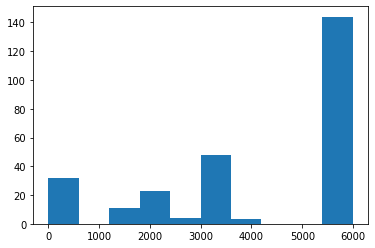

In [211]:
plt.hist(df['epochs'])

In [212]:
df = df[df['epochs'] > 5000]

(array([  0.,   0.,   0.,   0.,   0., 144.,   0.,   0.,   0.,   0.]),
 array([5994.5, 5994.6, 5994.7, 5994.8, 5994.9, 5995. , 5995.1, 5995.2,
        5995.3, 5995.4, 5995.5]),
 <BarContainer object of 10 artists>)

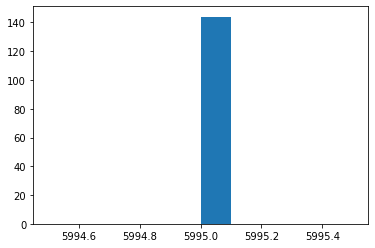

In [213]:
plt.hist(df['epochs'])

In [214]:
all_fields = [c for c in df.columns if any([c.startswith(t) for t in ['losses', 'metrics', 'config']])]
all_fields = [f for f in all_fields if len(set(df[f])) > 1]
all_fields.append('time_total_s')
# all_fields.remove('config/base_dir')
all_fields

['losses/opt1/fit/value',
 'losses/opt1/sparsity/coeff',
 'losses/opt1/sparsity/value',
 'losses/opt1/fit_all_on/value',
 'losses/opt1/fit_all_half/value',
 'losses/opt1/value',
 'metrics/fit/mean_feature',
 'metrics/fit/std_feature',
 'metrics/fit/min_feature',
 'metrics/fit/max_feature',
 'metrics/fit/loss_fcons',
 'metrics/fit/loss_rec',
 'metrics/fit/loss_fcons_pre',
 'metrics/fit/rec_fit_acc_loss_01_agg',
 'metrics/sparsity/sparsity_param_0_(6, 5)',
 'metrics/fit_all_on/mean_feature',
 'metrics/fit_all_on/std_feature',
 'metrics/fit_all_on/min_feature',
 'metrics/fit_all_on/max_feature',
 'metrics/fit_all_on/loss_fcons',
 'metrics/fit_all_on/loss_rec',
 'metrics/fit_all_on/loss_fcons_pre',
 'metrics/fit_all_on/rec_fit_acc_loss_01_agg',
 'metrics/fit_all_half/mean_feature',
 'metrics/fit_all_half/std_feature',
 'metrics/fit_all_half/min_feature',
 'metrics/fit_all_half/max_feature',
 'metrics/fit_all_half/loss_fcons',
 'metrics/fit_all_half/loss_rec',
 'metrics/fit_all_half/loss_fc

In [215]:
selected_all_fields = [
              'metrics/nnz',
              'config/_gin__freq__choice',
              'metrics/non_sparse_fit_loss_smooth',
              'metrics/fit_loss_smooth',
              'metrics/|last_add_sparsity_gap',
              'metrics/|last_mult_sparsity_gap',
              'config/_gin__mult__uniform']

In [216]:
assert set(selected_all_fields).issubset(all_fields)

In [217]:
all_fields = selected_all_fields

In [218]:
def removeprefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text  # or whatever


def shorten(x):
    x = removeprefix(x, 'losses/opt1/')
    x = removeprefix(x, 'config/_gin__')
    x = removeprefix(x, 'metrics/')
    return x
labels = {x: shorten(x) for x in all_fields}

In [219]:
df[all_fields]

metrics/nnz  config/_gin__freq__choice  \
0            9.0                        100   
1            8.0                         50   
2           15.0                        200   
3           11.0                         70   
4            8.0                         10   
..           ...                        ...   
258         10.0                         30   
259         15.0                        300   
260          9.0                         50   
261         10.0                        100   
262         14.0                        400   

     metrics/non_sparse_fit_loss_smooth  metrics/fit_loss_smooth  \
0                              0.064279                 2.040690   
1                              0.073185                 1.039929   
2                              0.025607                 0.024184   
3                              0.029704                 0.038767   
4                              0.316539                 7.691075   
..                                  ...                      ...   
258                            0.046294                 3.892719   
259                            0.031449                 0.029984   
260                            0.049964                 0.572399   
261                            0.022635                 0.080588   
262                            0.036678                 0.033562   

     metrics/|last_add_sparsity_gap  metrics/|last_mult_sparsity_gap  \
0                          1.976411                         0.968501   
1                          0.966743                         0.929625   
2                         -0.001423                        -0.058844   
3                          0.009063                         0.233786   
4                          7.374536                         0.958843   
..                              ...                              ...   
258                        3.846425                         0.988108   
259                       -0.001466                        -0.048881   
260                        0.522436                         0.912712   
261                        0.057953                         0.719122   
262                       -0.003116                        -0.092839   

     config/_gin__mult__uniform  
0                      0.830187  
1                      0.337503  
2                      0.226090  
3                      0.338093  
4                      0.460531  
..                          ...  
258                    0.330931  
259                    0.352572  
260                    0.452885  
261                    0.427879  
262                    0.447975  

[144 rows x 7 columns]

In [220]:
if np.min(df['metrics/non_sparse_fit_loss_smooth']) >= 0:
    df['metrics/fit_loss_smooth'] = np.log10(df['metrics/fit_loss_smooth'])
    df['metrics/non_sparse_fit_loss_smooth'] = np.log10(df['metrics/non_sparse_fit_loss_smooth'])
    df['metrics/|last_add_sparsity_gap'] = np.log10(df['metrics/|last_add_sparsity_gap'])

/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/sergei/miniconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning:

invalid value encountered in log10

/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set 

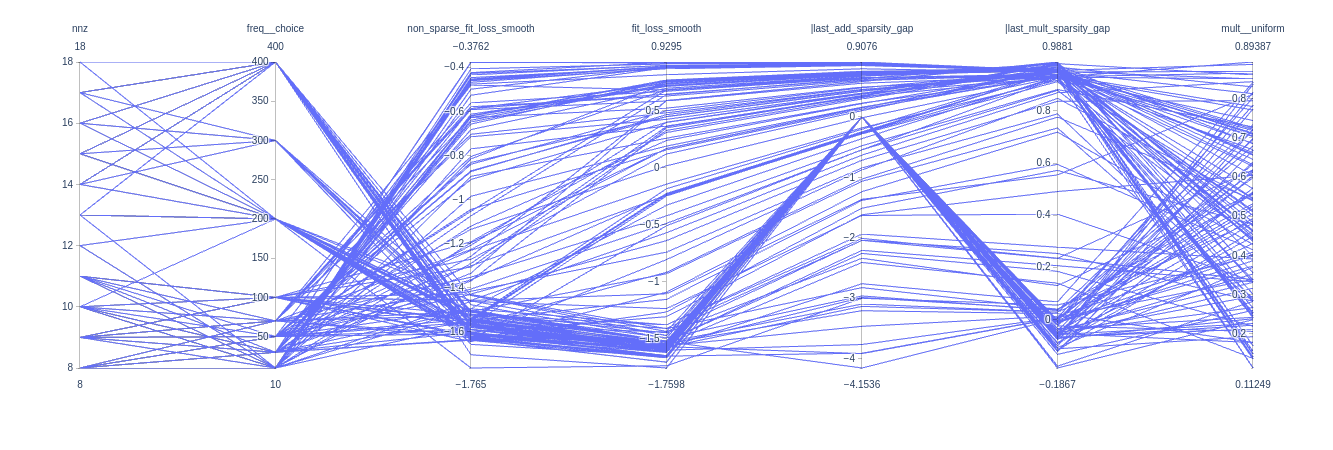

In [221]:
fig = px.parallel_coordinates(df[all_fields],# color="metrics/non_sparse_fit_loss_smooth",
                              labels=labels,
                             color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

(array([22., 27., 24., 17.,  5.,  8.,  9., 11., 10., 11.]),
 array([ 8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18.]),
 <BarContainer object of 10 artists>)

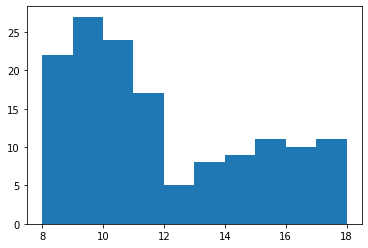

In [175]:
plt.hist(df['metrics/nnz'])
# ground truth: 7 items [maybe 1 on action side]

In [176]:
from causal_util.helpers import CPU_Unpickler
import seaborn as sns
from matplotlib import pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"
import pandas as pd
import gin
import sparse_causal_model_learner_rl.config
from causal_util.helpers import lstdct2dctlst
gin.enter_interactive_mode()

In [177]:
gin.bind_parameter('Config._unpickle_skip_init', True)

In [178]:
row = df.iloc[0]


In [179]:
def row_to_checkpoints(row, trials=trials):
    trial_substr = f"{row['trial_id']}_{row['experiment_tag']}"
    mask = [trial_substr in trial for trial in trials]
    assert sum(mask) == 1
    trial = trials[np.argmax(mask)]
    f = os.listdir(trial)
    f = filter(lambda x: x.startswith('checkpoint'), f)
    f = map(lambda x: os.path.join(trial, x, 'checkpoint'), f)
    f = list(filter(lambda x: os.path.isfile(x), f))
    ns = [int(x.split('_')[-1].split('/')[0]) for x in f]
    f = [f[i] for i in np.argsort(ns)]
    return f

In [180]:
ckpts = [row_to_checkpoints(row)[-1] for _, row in tqdm(df.iterrows())]

In [181]:
gin.parse_config(CPU_Unpickler(open(ckpts[0], 'rb')).load()._unpickled_state['gin_config'])

In [182]:
weights_by_epochs = [
    CPU_Unpickler(open(ckpt, 'rb')).load()._unpickled_state['trainables_weights']['model']['model.switch.probas'].detach().cpu().numpy().T[:, :-1]
    for ckpt in tqdm(ckpts)
]

In [183]:
from causal_util import load_env

In [184]:
ground_truth = 1. * np.abs(load_env().A) > 0

Make environment SparseMatrix-v0 None {}


<AxesSubplot:>

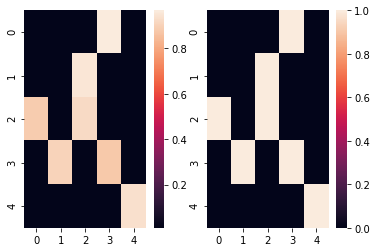

In [185]:
plt.subplot(1, 2, 1)
sns.heatmap(weights_by_epochs[0])
plt.subplot(1, 2, 2)
sns.heatmap(ground_truth)

In [186]:
from scipy.spatial.distance import cosine

In [187]:
distances = [cosine(w.flatten(), ground_truth.flatten()) for w in weights_by_epochs]

/home/sergei/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [189]:
all_fields.append('cosine_distances')

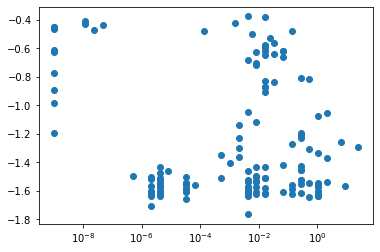

In [194]:
plt.scatter(df['losses/opt1/sparsity/coeff'], df['metrics/non_sparse_fit_loss_smooth'])
plt.xscale('log')